In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [55]:
# Read data from current directory
df = pd.read_csv('./train.csv')
#test = pd.read_csv('./test.csv')

In [56]:
# show data
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


(PoolQC          1453
 MiscFeature     1406
 Alley           1369
 Fence           1179
 FireplaceQu      690
 LotFrontage      259
 GarageCond        81
 GarageType        81
 GarageYrBlt       81
 GarageFinish      81
 GarageQual        81
 BsmtExposure      38
 BsmtFinType2      38
 BsmtFinType1      37
 BsmtCond          37
 BsmtQual          37
 MasVnrArea         8
 MasVnrType         8
 Electrical         1
 Utilities          0
 YearRemodAdd       0
 MSSubClass         0
 Foundation         0
 ExterCond          0
 ExterQual          0
 Exterior2nd        0
 Exterior1st        0
 RoofMatl           0
 RoofStyle          0
 YearBuilt          0
 LotConfig          0
 OverallCond        0
 OverallQual        0
 dtype: int64, <matplotlib.axes._subplots.AxesSubplot at 0x1df049ce5f8>)

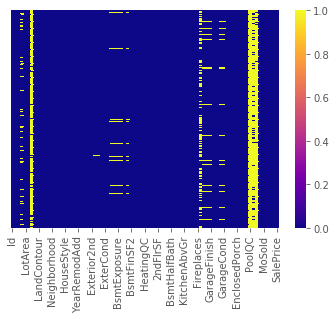

In [57]:
# Check the missing values and drop columns which have missing values more than 70%
df.isnull().sum().sort_values(ascending=False)[0:33],sns.heatmap(df.isnull(),yticklabels=False, cmap='plasma')

In [58]:
# Not much information
df.Utilities.value_counts(dropna=False)

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [59]:
# Drop the missing values in these columns
list1 = ['Alley','Utilities', 'PoolQC', 'Fence', 'MiscFeature']
for item in list1:
    df.drop(columns=item, inplace=True)

In [60]:
# Get the list of object and numerical type column
def get_object_cols(df):
    return list(df.select_dtypes(include='object').columns)

def get_numerical_cols(df):
    return list(df.select_dtypes(exclude='object').columns)

In [61]:
# list the object type column
object_cols_train = get_object_cols(df)
object_cols_train, len(object_cols_train)

(['MSZoning',
  'Street',
  'LotShape',
  'LandContour',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'SaleType',
  'SaleCondition'],
 38)

In [62]:
## mapping object type to numerical
## selecting columns for mapping dict

dict={'Y' : 1, 'N' : 2, 'Ex': 1, 'Gd' : 2, 'TA' :3, 'Fa' : 4, 'Po' : 5,  
     'GLQ' : 1, 'ALQ' : 2, 'BLQ' : 3, 'Rec' : 4, 'LwQ' : 5, 'Unf' : 6, 'NA' :7,
     'Gd' : 1 , 'Av' :2, 'Mn' : 3, 'No' :4, 'Gtl' : 1, 'Mod' : 2, 'Sev' :3,
      'Reg' : 1, 'IR1' :2, 'IR2' :3, 'IR3' :4}


# 'RL':1, 'RM':2,'FV':3,'RH':4,'C (all)':5, 'Pave':1, 'Grvl':2,'Lvl':1,'Bnk':1,'HLS':2,'Low':3,'Inside':1, 'Corner':2,'CulDSac':3,
# 'FR2':4, 'FR3':5, 'Y':1, 'N':2, 'P':3,'Norm':1, 'Feedr':2, 'PosN':3, 'Artery':4, 'RRAe':5, 'RRNn':6, 'RRAn':7, 'PosA':8,'RRNe':9 
cols=['KitchenQual','LotShape','LandSlope','HeatingQC','FireplaceQu','ExterQual','ExterCond','BsmtQual',
     'BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','CentralAir']
for i in cols:
    df[i]=df[i].map(dict)


In [63]:
dict = {'RL' :1, 'RM' :2,'FV':3,'RH' :4,'C (all)' :5, 'Pave' :1, 'Grvl' :2,
        'Lvl' :1,'Bnk' :1,'HLS':2,'Low' :3,'Inside' :1, 'Corner' :2,'CulDSac' :3,
       'FR2' :4, 'FR3' :5, 'Y':1, 'N' :2, 'P':3,'Norm' :1, 'Feedr' :2, 'PosN' :3, 'Artery' :4,
        'RRAe' :5, 'RRNn' :6, 'RRAn' :7, 'PosA':8,'RRNe' :9, 'TA': 1, 'Fa':2, 'Gd':3, 'Po':4, 'Ex':5}
cols=['Street','GarageQual','MSZoning', 'LandContour', 'Condition1', 'Condition2', 'GarageCond']
# 
for i in cols:
    df[i]=df[i].map(dict)

In [64]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,1,65.0,8450,1,1,1,Inside,1,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,1,80.0,9600,1,1,1,FR2,1,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,1,68.0,11250,1,2,1,Inside,1,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,1,60.0,9550,1,2,1,Corner,1,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,1,84.0,14260,1,2,1,FR2,1,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,1,85.0,14115,1,2,1,Inside,1,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,1,75.0,10084,1,1,1,Inside,1,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,1,NaN,10382,1,2,1,Corner,1,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,2,51.0,6120,1,1,1,Inside,1,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,1,50.0,7420,1,1,1,Corner,1,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
LotConfig        1460 non-null object
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null int64
Condition2       1460 non-null int64
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null o

In [66]:
# obtain object type column and numerical
object_cols_train = get_object_cols(df)
# train numerical cols
numerical_cols_train = get_numerical_cols(df)

In [67]:
object_cols_train,len(object_cols_train)

(['LotConfig',
  'Neighborhood',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'Foundation',
  'Heating',
  'Electrical',
  'Functional',
  'GarageType',
  'GarageFinish',
  'PavedDrive',
  'SaleType',
  'SaleCondition'],
 18)

In [68]:
df.Neighborhood.value_counts(dropna=False)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [69]:
#Create the dictionary to map the label for each column
df.Neighborhood.unique()

dict = {'CollgCr':1, 'Veenker':2, 'Crawfor':3, 'NoRidge':4, 'Mitchel':5, 'Somerst':6,
       'NWAmes':7, 'OldTown':8, 'BrkSide':9, 'Sawyer':10, 'NridgHt':11, 'NAmes':12,
       'SawyerW':13, 'IDOTRR':14, 'MeadowV':15, 'Edwards':16, 'Timber':17, 'Gilbert':18,
       'StoneBr':19, 'ClearCr':20, 'NPkVill':21, 'Blmngtn':22, 'BrDale':23, 'SWISU':24,
       'Blueste':25}

cols=['Neighborhood']
for i in cols:
    df[i]=df[i].map(dict)


In [70]:
df.LotConfig.unique()
dict={'Inside':1, 'FR2':2, 'Corner':3, 'CulDSac':4, 'FR3':5}
cols=['LotConfig']
for i in cols:
    df[i]=df[i].map(dict)

In [71]:
df.BldgType.unique()
dict={'1Fam':1, '2fmCon':2, 'Duplex':3, 'TwnhsE':4, 'Twnhs':5}
cols=['BldgType']
for i in cols:
    df[i]=df[i].map(dict)

In [72]:
df.HouseStyle.unique()
dict={'2Story':1, '1Story':2, '1.5Fin':3, '1.5Unf':4, 'SFoyer':5, 'SLvl':6, '2.5Unf':7,
       '2.5Fin':8}
cols=['HouseStyle']
for i in cols:
    df[i]=df[i].map(dict)

In [73]:
df.RoofStyle.unique()
dict={'Gable':1, 'Hip':2, 'Gambrel':3, 'Mansard':4, 'Flat':5, 'Shed':6}
cols=['RoofStyle']
for i in cols:
    df[i]=df[i].map(dict)

In [74]:
df.RoofMatl.unique()
dict={'CompShg':1, 'WdShngl':2, 'Metal':3, 'WdShake':4, 'Membran':5, 'Tar&Grv':6,
       'Roll':7, 'ClyTile':8}
cols=['RoofMatl']
for i in cols:
    df[i]=df[i].map(dict)

In [75]:
df.Exterior1st.unique()
dict={'VinylSd':1, 'MetalSd':2, 'Wd Sdng':3, 'HdBoard':4, 'BrkFace':5, 'WdShing':6,
       'CemntBd':7, 'Plywood':8, 'AsbShng':9, 'Stucco':10, 'BrkComm':11, 'AsphShn':12,
       'Stone':13, 'ImStucc':14, 'CBlock':15}
cols=['Exterior1st']
for i in cols:
    df[i]=df[i].map(dict)

In [76]:
df.Exterior2nd.unique()
dict={'VinylSd':1, 'MetalSd':2, 'Wd Shng':3, 'HdBoard':4, 'Plywood':5, 'Wd Sdng':6,
       'CmentBd':7, 'BrkFace':8, 'Stucco':9, 'AsbShng':10, 'Brk Cmn':11, 'ImStucc':12,
       'AsphShn':13, 'Stone':14, 'Other':15, 'CBlock':16}
cols=['Exterior2nd']
for i in cols:
    df[i]=df[i].map(dict)

In [77]:
df.MasVnrType.unique()
dict={'BrkFace':1, 'None':2, 'Stone':3, 'BrkCmn':4}
cols=['MasVnrType']
for i in cols:
    df[i]=df[i].map(dict)

In [78]:
df.Foundation.unique()
dict={'PConc':1, 'CBlock':2, 'BrkTil':3, 'Wood':4, 'Slab':5, 'Stone':6}
cols=['Foundation']
for i in cols:
    df[i]=df[i].map(dict)

In [79]:
df.Heating.unique()
dict={'GasA':1, 'GasW':2, 'Grav':3, 'Wall':4, 'OthW':5, 'Floor':6}
cols=['Heating']
for i in cols:
    df[i]=df[i].map(dict)

In [80]:
df.Electrical.unique()
dict={'SBrkr':1, 'FuseF':2, 'FuseA':3, 'FuseP':4, 'Mix':5}
cols=['Electrical']
for i in cols:
    df[i]=df[i].map(dict)

In [81]:
df.Functional.unique()
dict={'Typ':1, 'Min1':2, 'Maj1':3, 'Min2':4, 'Mod':5, 'Maj2':6, 'Sev':7}
cols=['Functional']
for i in cols:
    df[i]=df[i].map(dict)

In [82]:
df.GarageType.unique()
dict={'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'CarPort':4, 'Basment':5, '2Types':6}
cols=['GarageType']
for i in cols:
    df[i]=df[i].map(dict)

In [83]:
df.GarageFinish.unique()
dict={'RFn':1, 'Unf':2, 'Fin':3}
cols=['GarageFinish']
for i in cols:
    df[i]=df[i].map(dict)

In [84]:
df.PavedDrive.unique()
dict={'Y':1, 'N':2, 'P':3}
cols=['PavedDrive']
for i in cols:
    df[i]=df[i].map(dict)

In [85]:
df.SaleType.unique()
dict={'WD':1, 'New':2, 'COD':3, 'ConLD':4, 'ConLI':5, 'CWD':6, 'ConLw':7, 'Con':8, 'Oth':9}
cols=['SaleType']
for i in cols:
    df[i]=df[i].map(dict)

In [86]:
df.SaleCondition.unique()
dict={'Normal':1, 'Abnorml':2, 'Partial':3, 'AdjLand':4, 'Alloca':5, 'Family':6}
cols=['SaleCondition']
for i in cols:
    df[i]=df[i].map(dict)

In [87]:
# obtain object type column and numerical
object_cols_train = get_object_cols(df)
object_cols_train

[]

In [88]:
df.FireplaceQu.value_counts(dropna=False)

NaN    690
1.0    404
3.0    313
4.0     33
5.0     20
Name: FireplaceQu, dtype: int64

In [89]:
df.isnull().sum().sort_values(ascending=False)

FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
YearBuilt          0
Exterior2nd        0
Exterior1st        0
ExterQual          0
ExterCond          0
Foundation         0
RoofMatl           0
RoofStyle          0
YearRemodAdd       0
SalePrice          0
OverallCond        0
OverallQual        0
HouseStyle         0
BldgType           0
Condition2         0
                ... 
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
BsmtUnfSF          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr 

In [90]:
# Set NaN to mean
for item in df.columns:
    df[item].fillna((df[item].mean()), inplace=True)

In [91]:
# Create x and y for training a model not including object column
X=df.drop(['SalePrice'],axis=1)
Y=df['SalePrice']
#for item in object_cols_train:
    #X.drop(columns=item, inplace=True)

In [92]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,1,65.000000,8450,1,1,1,1,1,...,61,0,0,0,0,0,2,2008,1,1
1,2,20,1,80.000000,9600,1,1,1,2,1,...,0,0,0,0,0,0,5,2007,1,1
2,3,60,1,68.000000,11250,1,2,1,1,1,...,42,0,0,0,0,0,9,2008,1,1
3,4,70,1,60.000000,9550,1,2,1,3,1,...,35,272,0,0,0,0,2,2006,1,2
4,5,60,1,84.000000,14260,1,2,1,2,1,...,84,0,0,0,0,0,12,2008,1,1
5,6,50,1,85.000000,14115,1,2,1,1,1,...,30,0,320,0,0,700,10,2009,1,1
6,7,20,1,75.000000,10084,1,1,1,1,1,...,57,0,0,0,0,0,8,2007,1,1
7,8,60,1,70.049958,10382,1,2,1,3,1,...,204,228,0,0,0,350,11,2009,1,1
8,9,50,2,51.000000,6120,1,1,1,1,1,...,0,205,0,0,0,0,4,2008,1,2
9,10,190,1,50.000000,7420,1,1,1,3,1,...,4,0,0,0,0,0,1,2008,1,1


In [93]:
# split data to train and test as 80% and 20%
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state=42)


# Create a model

xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=0)


In [94]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=0)

In [95]:
score = xgbr.score(xtrain, ytrain)

In [96]:
print("Training score: ", score)

Training score:  0.9648151292579609


In [97]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())


Mean cross-validation score: 0.86


In [98]:
# Predict output
y_pred=xgbr.predict(xtest)
y_pred

array([141266.78 , 339928.7  , 124062.805, 152385.14 , 325916.6  ,
        82814.195, 228171.39 , 143718.61 ,  82152.73 , 134925.7  ,
       155228.02 , 125940.64 , 116206.49 , 202343.5  , 171119.38 ,
       138163.9  , 195286.7  , 137797.83 , 112486.   , 213213.17 ,
       161271.47 , 217943.38 , 173923.03 , 122646.78 , 200779.62 ,
       165282.83 , 193429.   , 105406.4  , 175361.92 , 188020.4  ,
       119858.63 , 247805.92 , 227479.66 , 117741.52 , 247967.81 ,
       146802.36 , 130567.125, 207249.75 , 333621.   , 103307.15 ,
       125428.22 , 247470.97 , 116469.2  , 367081.6  , 123693.98 ,
       139344.73 , 119943.16 , 127987.06 , 422576.75 , 134394.53 ,
       122936.65 , 196280.98 , 108808.56 , 378596.7  , 146872.38 ,
       246463.66 , 197714.94 , 157522.33 , 141996.11 ,  98958.44 ,
        72907.7  , 157028.44 , 301410.53 , 290121.44 , 283312.78 ,
       224365.39 , 110699.22 , 342185.4  , 116987.98 , 156255.7  ,
       130877.17 , 121017.02 , 114044.305,  87654.6  , 318354.

In [99]:
ytest

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
1040    155000
453     210000
670     173500
1094    129000
192     192000
123     153900
415     181134
277     141000
433     181000
1317    208900
         ...  
233     128200
426     275000
196     311872
1226    214000
81      153500
1368    144000
1125    115000
111     180000
1243    465000
744     180000
937     253000
344      85000
1232    101800
865     148500
1088    137500
350     318061
588     143000
1427    140000
948     192500
1449     92000
989     197000
677     109500
478     297000
1271    185750
1410    230000
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

In [100]:
ytest-y_pred

892     13233.218750
1105   -14928.687500
413     -9062.804688
522      6614.859375
1036   -10416.593750
614     -7314.195312
218     83328.609375
1160     2281.390625
649      2347.273438
887       574.296875
576    -10228.015625
1252     4059.359375
1061   -35206.492188
567     11656.500000
1108     9880.625000
1113    -3663.906250
168    -11786.703125
1102    -2797.828125
1120     5914.000000
67      12786.828125
1040    -6271.468750
453     -7943.375000
670      -423.031250
1094     6353.218750
192     -8779.625000
123    -11382.828125
415    -12295.000000
277     35593.601562
433      5638.078125
1317    20879.593750
            ...     
233     -4443.750000
426     41803.328125
196     39247.437500
1226     5969.765625
81     -17000.281250
1368     2830.953125
1125     3594.539062
111     12757.437500
1243    61092.937500
744    -43628.875000
937     30780.671875
344     -6684.703125
1232    -6235.195312
865     23026.601562
1088   -16688.562500
350     26616.937500
588    -70574

In [101]:
from sklearn.metrics import mean_absolute_error
vytest= ytest.to_numpy()
print("Mean Absolute Error:", mean_absolute_error(vytest, y_pred))
print("Mean Squared Error:", mean_squared_error(vytest, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(vytest, y_pred))  )

Mean Absolute Error: 17724.98678296233
Mean Squared Error: 935230170.8312684
Root Mean Squared Error: 30581.533166786594


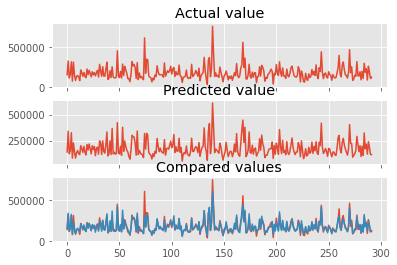

In [102]:
# Compare actual and predicted values

fig, axs = plt.subplots(3)
axs[0].set_title('Actual value')
axs[0].plot(vytest)
axs[1].set_title('Predicted value')
axs[1].plot(y_pred)
axs[2].set_title('Compared values')
axs[2].plot(vytest)
axs[2].plot(y_pred)
for ax in axs.flat:
    ax.label_outer()

In [103]:
# XGB with regularization
reg_xgb = xgb.XGBRegressor(colsample_bytree=0.45, gamma=0.045, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2200,
                             reg_alpha=0.45, reg_lambda=0.85,
                             subsample=0.52, silent=1,
                             random_state =6, nthread = -1,verbosity=0)
print(reg_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.45, gamma=0.045,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1.8, missing=None, n_estimators=2200,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=6,
       reg_alpha=0.45, reg_lambda=0.85, scale_pos_weight=1, seed=None,
       silent=1, subsample=0.52, verbosity=0)


In [104]:

reg_xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.45, gamma=0.045,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1.8, missing=None, n_estimators=2200,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=6,
       reg_alpha=0.45, reg_lambda=0.85, scale_pos_weight=1, seed=None,
       silent=1, subsample=0.52, verbosity=0)

In [53]:
score = reg_xgb.score(xtrain, ytrain)
print("Training score: ", score)

Training score:  0.998882254550263


In [54]:
scores = cross_val_score(reg_xgb, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.87


In [55]:
mean = mean_absolute_error(vytest, y_pred)
mean

17724.98678296233

In [106]:
# Predict output
y_pred=reg_xgb.predict(xtest)
y_pred

array([141019.98 , 327876.5  , 106244.95 , 154908.9  , 323097.88 ,
        72797.46 , 236475.52 , 148651.48 ,  79498.29 , 129504.71 ,
       153005.78 , 122439.99 , 107608.11 , 204157.44 , 169214.89 ,
       132708.62 , 193910.16 , 128101.7  , 115534.625, 210156.53 ,
       162194.39 , 218209.19 , 174153.64 , 136143.9  , 203829.89 ,
       165978.66 , 194887.55 , 103544.516, 175892.14 , 193367.72 ,
       116972.766, 268052.53 , 231649.64 , 120210.63 , 268383.12 ,
       147571.55 , 148090.12 , 207739.88 , 347676.62 , 108091.12 ,
       122112.234, 231946.14 , 116900.086, 369718.53 , 122129.766,
       128808.68 , 110567.95 , 124110.28 , 437549.3  , 142069.3  ,
       119898.445, 214456.31 , 107455.82 , 334479.5  , 147935.31 ,
       248450.36 , 204780.02 , 146068.2  , 137457.9  ,  88943.25 ,
        66601.4  , 163328.23 , 294435.22 , 309080.62 , 302964.6  ,
       228877.83 , 108613.34 , 333212.   , 115857.04 , 167904.16 ,
       119798.375, 124690.78 , 111927.13 ,  83533.57 , 401665.

In [107]:
ytest

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
1113    134500
168     183500
1102    135000
1120    118400
67      226000
1040    155000
453     210000
670     173500
1094    129000
192     192000
123     153900
415     181134
277     141000
433     181000
1317    208900
         ...  
233     128200
426     275000
196     311872
1226    214000
81      153500
1368    144000
1125    115000
111     180000
1243    465000
744     180000
937     253000
344      85000
1232    101800
865     148500
1088    137500
350     318061
588     143000
1427    140000
948     192500
1449     92000
989     197000
677     109500
478     297000
1271    185750
1410    230000
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

In [108]:
ytest-y_pred

892     13480.015625
1105    -2876.500000
413      8755.046875
522      4091.093750
1036    -7597.875000
614      2702.539062
218     75024.484375
1160    -2651.484375
649      5001.710938
887      5995.289062
576     -8005.781250
1252     7560.007812
1061   -26608.109375
567      9842.562500
1108    11785.109375
1113     1791.375000
168    -10410.156250
1102     6898.296875
1120     2865.375000
67      15843.468750
1040    -7194.390625
453     -8209.187500
670      -653.640625
1094    -7143.906250
192    -11829.890625
123    -12078.656250
415    -13753.546875
277     37455.484375
433      5107.859375
1317    15532.281250
            ...     
233     -9614.828125
426     47829.031250
196     -2257.625000
1226    13832.359375
81     -17439.859375
1368     7033.593750
1125     9229.773438
111      4890.484375
1243    55930.781250
744    -51440.593750
937     17741.437500
344      1343.828125
1232     5702.273438
865     14180.093750
1088     3517.359375
350     39906.156250
588    -98842

In [109]:
vytest= ytest.to_numpy()
print("Mean Absolute Error:", mean_absolute_error(vytest, y_pred))
print("Mean Squared Error:", mean_squared_error(vytest, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(vytest, y_pred))  )

Mean Absolute Error: 15965.295925192637
Mean Squared Error: 732608967.7486861
Root Mean Squared Error: 27066.75022511358


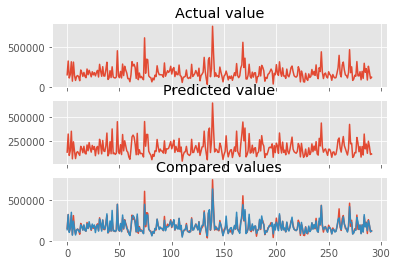

In [60]:
# Compare actual and predicted values
fig, axs = plt.subplots(3)
axs[0].set_title('Actual value')
axs[0].plot(vytest)
axs[1].set_title('Predicted value')
axs[1].plot(y_pred)
axs[2].set_title('Compared values')
axs[2].plot(vytest)
axs[2].plot(y_pred)
for ax in axs.flat:
    ax.label_outer()

In [41]:
vxtrain= xtrain.to_numpy()
vytrain= ytrain.to_numpy()
vxtest= xtest.to_numpy()
vytest= ytest.to_numpy()
vxtrain.shape,vytrain.shape

((1168, 75), (1168,))

In [62]:
# Create deep learning model
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.layers import LSTM
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = vxtrain.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.1))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.1))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dropout(0.1))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2432      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)      

In [54]:
from keras.callbacks import ModelCheckpoint
# Create Checkpoint to save the improved weight to computer with .hdf5
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [64]:
NN_model.fit(vxtrain, vytrain, epochs=1500, batch_size=5, validation_split = 0.2, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 934 samples, validate on 234 samples
Epoch 1/1500
934/934 [==============================] - 1s 785us/step - loss: 112485.4631 - mean_absolute_error: 112485.4631 - val_loss: 41204.0521 - val_mean_absolute_error: 41204.0521

Epoch 00001: val_loss improved from inf to 41204.05206, saving model to Weights-001--41204.05206.hdf5
Epoch 2/1500
934/934 [==============================] - 0s 312us/step - loss: 50473.5942 - mean_absolute_error: 50473.5942 - val_loss: 38310.7327 - val_mean_absolute_error: 38310.7327

Epoch 00002: val_loss improved from 41204.05206 to 38310.73270, saving model to Weights-002--38310.73270.hdf5
Epoch 3/1500
934/934 [==============================] - 0s 335us/step - loss: 48056.8676 - mean_absolute_error: 48056.8676 - val_loss: 36058.9719 - val_mean_absolute_error: 36058.9719

Epoch 00003: val_loss improved from 38310.73270 to 36058.97188, saving model to Weights-003--36058.97188.hdf5
Epoch 4/1500
934/934 [=====

934/934 [==============================] - 0s 264us/step - loss: 33638.3314 - mean_absolute_error: 33638.3314 - val_loss: 24932.4226 - val_mean_absolute_error: 24932.4226

Epoch 00063: val_loss did not improve from 21237.05381
Epoch 64/1500
934/934 [==============================] - 0s 262us/step - loss: 32702.8184 - mean_absolute_error: 32702.8184 - val_loss: 21059.8593 - val_mean_absolute_error: 21059.8593

Epoch 00064: val_loss improved from 21237.05381 to 21059.85932, saving model to Weights-064--21059.85932.hdf5
Epoch 65/1500
934/934 [==============================] - 0s 315us/step - loss: 33139.2296 - mean_absolute_error: 33139.2296 - val_loss: 21133.4551 - val_mean_absolute_error: 21133.4551

Epoch 00065: val_loss did not improve from 21059.85932
Epoch 66/1500
934/934 [==============================] - 0s 282us/step - loss: 33990.9484 - mean_absolute_error: 33990.9484 - val_loss: 24506.7450 - val_mean_absolute_error: 24506.7450

Epoch 00066: val_loss did not improve from 21059.8


Epoch 00096: val_loss did not improve from 20905.09616
Epoch 97/1500
934/934 [==============================] - 0s 262us/step - loss: 33975.6934 - mean_absolute_error: 33975.6934 - val_loss: 24382.0908 - val_mean_absolute_error: 24382.0908

Epoch 00097: val_loss did not improve from 20905.09616
Epoch 98/1500
934/934 [==============================] - 0s 270us/step - loss: 34665.2408 - mean_absolute_error: 34665.2408 - val_loss: 23834.2527 - val_mean_absolute_error: 23834.2527

Epoch 00098: val_loss did not improve from 20905.09616
Epoch 99/1500
934/934 [==============================] - 0s 264us/step - loss: 31856.3810 - mean_absolute_error: 31856.3810 - val_loss: 21105.8407 - val_mean_absolute_error: 21105.8407

Epoch 00099: val_loss did not improve from 20905.09616
Epoch 100/1500
934/934 [==============================] - 0s 271us/step - loss: 32908.2103 - mean_absolute_error: 32908.2103 - val_loss: 20922.4554 - val_mean_absolute_error: 20922.4554

Epoch 00100: val_loss did not impr

934/934 [==============================] - 0s 275us/step - loss: 31479.8526 - mean_absolute_error: 31479.8526 - val_loss: 22227.2036 - val_mean_absolute_error: 22227.2036

Epoch 00163: val_loss did not improve from 20572.09579
Epoch 164/1500
934/934 [==============================] - 0s 257us/step - loss: 31766.1029 - mean_absolute_error: 31766.1029 - val_loss: 20785.8351 - val_mean_absolute_error: 20785.8351

Epoch 00164: val_loss did not improve from 20572.09579
Epoch 165/1500
934/934 [==============================] - 0s 266us/step - loss: 31198.7767 - mean_absolute_error: 31198.7767 - val_loss: 21417.8482 - val_mean_absolute_error: 21417.8482

Epoch 00165: val_loss did not improve from 20572.09579
Epoch 166/1500
934/934 [==============================] - 0s 265us/step - loss: 32177.6214 - mean_absolute_error: 32177.6214 - val_loss: 23843.4942 - val_mean_absolute_error: 23843.4942

Epoch 00166: val_loss did not improve from 20572.09579
Epoch 167/1500
934/934 [=======================

934/934 [==============================] - 0s 265us/step - loss: 30315.6376 - mean_absolute_error: 30315.6376 - val_loss: 20205.7742 - val_mean_absolute_error: 20205.7742

Epoch 00229: val_loss did not improve from 19876.97443
Epoch 230/1500
934/934 [==============================] - 0s 266us/step - loss: 30530.8537 - mean_absolute_error: 30530.8537 - val_loss: 21861.4281 - val_mean_absolute_error: 21861.4281

Epoch 00230: val_loss did not improve from 19876.97443
Epoch 231/1500
934/934 [==============================] - 0s 277us/step - loss: 30744.3497 - mean_absolute_error: 30744.3497 - val_loss: 20395.5347 - val_mean_absolute_error: 20395.5347

Epoch 00231: val_loss did not improve from 19876.97443
Epoch 232/1500
934/934 [==============================] - 0s 268us/step - loss: 30573.2619 - mean_absolute_error: 30573.2619 - val_loss: 23512.6258 - val_mean_absolute_error: 23512.6258

Epoch 00232: val_loss did not improve from 19876.97443
Epoch 233/1500
934/934 [=======================


Epoch 00295: val_loss did not improve from 19253.61144
Epoch 296/1500
934/934 [==============================] - 0s 259us/step - loss: 29049.1415 - mean_absolute_error: 29049.1415 - val_loss: 19436.7239 - val_mean_absolute_error: 19436.7239

Epoch 00296: val_loss did not improve from 19253.61144
Epoch 297/1500
934/934 [==============================] - 0s 261us/step - loss: 29343.1963 - mean_absolute_error: 29343.1963 - val_loss: 23915.9966 - val_mean_absolute_error: 23915.9966

Epoch 00297: val_loss did not improve from 19253.61144
Epoch 298/1500
934/934 [==============================] - 0s 267us/step - loss: 28746.0971 - mean_absolute_error: 28746.0971 - val_loss: 20072.8841 - val_mean_absolute_error: 20072.8841

Epoch 00298: val_loss did not improve from 19253.61144
Epoch 299/1500
934/934 [==============================] - 0s 266us/step - loss: 29487.9657 - mean_absolute_error: 29487.9657 - val_loss: 22532.8610 - val_mean_absolute_error: 22532.8610

Epoch 00299: val_loss did not i

934/934 [==============================] - 0s 257us/step - loss: 29038.5963 - mean_absolute_error: 29038.5963 - val_loss: 18824.7761 - val_mean_absolute_error: 18824.7761

Epoch 00329: val_loss improved from 18915.16218 to 18824.77605, saving model to Weights-329--18824.77605.hdf5
Epoch 330/1500
934/934 [==============================] - 0s 269us/step - loss: 29540.2326 - mean_absolute_error: 29540.2326 - val_loss: 23735.4489 - val_mean_absolute_error: 23735.4489

Epoch 00330: val_loss did not improve from 18824.77605
Epoch 331/1500
934/934 [==============================] - 0s 267us/step - loss: 29742.3030 - mean_absolute_error: 29742.3030 - val_loss: 28426.6260 - val_mean_absolute_error: 28426.6260

Epoch 00331: val_loss did not improve from 18824.77605
Epoch 332/1500
934/934 [==============================] - 0s 271us/step - loss: 29457.6360 - mean_absolute_error: 29457.6360 - val_loss: 32155.9737 - val_mean_absolute_error: 32155.9737

Epoch 00332: val_loss did not improve from 1882


Epoch 00361: val_loss did not improve from 18251.22101
Epoch 362/1500
934/934 [==============================] - 0s 333us/step - loss: 28006.5145 - mean_absolute_error: 28006.5145 - val_loss: 20012.8965 - val_mean_absolute_error: 20012.8965

Epoch 00362: val_loss did not improve from 18251.22101
Epoch 363/1500
934/934 [==============================] - 0s 292us/step - loss: 27741.8481 - mean_absolute_error: 27741.8481 - val_loss: 24784.4481 - val_mean_absolute_error: 24784.4481

Epoch 00363: val_loss did not improve from 18251.22101
Epoch 364/1500
934/934 [==============================] - 0s 268us/step - loss: 28257.9180 - mean_absolute_error: 28257.9180 - val_loss: 29675.1642 - val_mean_absolute_error: 29675.1642

Epoch 00364: val_loss did not improve from 18251.22101
Epoch 365/1500
934/934 [==============================] - 0s 269us/step - loss: 28516.2326 - mean_absolute_error: 28516.2326 - val_loss: 20474.5209 - val_mean_absolute_error: 20474.5209

Epoch 00365: val_loss did not i


Epoch 00428: val_loss did not improve from 17934.64165
Epoch 429/1500
934/934 [==============================] - 0s 262us/step - loss: 27626.0548 - mean_absolute_error: 27626.0548 - val_loss: 18915.4989 - val_mean_absolute_error: 18915.4989

Epoch 00429: val_loss did not improve from 17934.64165
Epoch 430/1500
934/934 [==============================] - 0s 268us/step - loss: 27546.2047 - mean_absolute_error: 27546.2047 - val_loss: 18348.2155 - val_mean_absolute_error: 18348.2155

Epoch 00430: val_loss did not improve from 17934.64165
Epoch 431/1500
934/934 [==============================] - 0s 263us/step - loss: 26900.2868 - mean_absolute_error: 26900.2868 - val_loss: 22618.1305 - val_mean_absolute_error: 22618.1305

Epoch 00431: val_loss did not improve from 17934.64165
Epoch 432/1500
934/934 [==============================] - 0s 271us/step - loss: 27511.4176 - mean_absolute_error: 27511.4176 - val_loss: 23172.5630 - val_mean_absolute_error: 23172.5630

Epoch 00432: val_loss did not i

934/934 [==============================] - 0s 262us/step - loss: 27550.5730 - mean_absolute_error: 27550.5730 - val_loss: 26070.2082 - val_mean_absolute_error: 26070.2082

Epoch 00495: val_loss did not improve from 17773.85792
Epoch 496/1500
934/934 [==============================] - 0s 264us/step - loss: 26959.0961 - mean_absolute_error: 26959.0961 - val_loss: 22515.6927 - val_mean_absolute_error: 22515.6927

Epoch 00496: val_loss did not improve from 17773.85792
Epoch 497/1500
934/934 [==============================] - 0s 261us/step - loss: 26220.5020 - mean_absolute_error: 26220.5020 - val_loss: 22041.6160 - val_mean_absolute_error: 22041.6160

Epoch 00497: val_loss did not improve from 17773.85792
Epoch 498/1500
934/934 [==============================] - 0s 270us/step - loss: 27437.5048 - mean_absolute_error: 27437.5048 - val_loss: 18107.1324 - val_mean_absolute_error: 18107.1324

Epoch 00498: val_loss did not improve from 17773.85792
Epoch 499/1500
934/934 [=======================

934/934 [==============================] - 0s 264us/step - loss: 25791.2353 - mean_absolute_error: 25791.2353 - val_loss: 25213.6736 - val_mean_absolute_error: 25213.6736

Epoch 00529: val_loss did not improve from 17773.85792
Epoch 530/1500
934/934 [==============================] - 0s 280us/step - loss: 27523.5468 - mean_absolute_error: 27523.5468 - val_loss: 18371.7088 - val_mean_absolute_error: 18371.7088

Epoch 00530: val_loss did not improve from 17773.85792
Epoch 531/1500
934/934 [==============================] - 0s 263us/step - loss: 27519.9199 - mean_absolute_error: 27519.9199 - val_loss: 18338.6019 - val_mean_absolute_error: 18338.6019

Epoch 00531: val_loss did not improve from 17773.85792
Epoch 532/1500
934/934 [==============================] - 0s 267us/step - loss: 26706.4896 - mean_absolute_error: 26706.4896 - val_loss: 26663.3794 - val_mean_absolute_error: 26663.3794

Epoch 00532: val_loss did not improve from 17773.85792
Epoch 533/1500
934/934 [=======================


Epoch 00562: val_loss did not improve from 17380.50020
Epoch 563/1500
934/934 [==============================] - 0s 372us/step - loss: 27515.8167 - mean_absolute_error: 27515.8167 - val_loss: 28566.7052 - val_mean_absolute_error: 28566.7052

Epoch 00563: val_loss did not improve from 17380.50020
Epoch 564/1500
934/934 [==============================] - 0s 343us/step - loss: 27903.1457 - mean_absolute_error: 27903.1457 - val_loss: 18721.9301 - val_mean_absolute_error: 18721.9301

Epoch 00564: val_loss did not improve from 17380.50020
Epoch 565/1500
934/934 [==============================] - 0s 282us/step - loss: 27400.3370 - mean_absolute_error: 27400.3370 - val_loss: 26478.9862 - val_mean_absolute_error: 26478.9862

Epoch 00565: val_loss did not improve from 17380.50020
Epoch 566/1500
934/934 [==============================] - 0s 299us/step - loss: 26148.2510 - mean_absolute_error: 26148.2510 - val_loss: 20478.3092 - val_mean_absolute_error: 20478.3092

Epoch 00566: val_loss did not i

934/934 [==============================] - 0s 267us/step - loss: 26881.5519 - mean_absolute_error: 26881.5519 - val_loss: 28715.0330 - val_mean_absolute_error: 28715.0330

Epoch 00630: val_loss did not improve from 17119.03343
Epoch 631/1500
934/934 [==============================] - 0s 255us/step - loss: 28613.2880 - mean_absolute_error: 28613.2880 - val_loss: 21835.9909 - val_mean_absolute_error: 21835.9909

Epoch 00631: val_loss did not improve from 17119.03343
Epoch 632/1500
934/934 [==============================] - 0s 279us/step - loss: 26710.8285 - mean_absolute_error: 26710.8285 - val_loss: 25445.6635 - val_mean_absolute_error: 25445.6635

Epoch 00632: val_loss did not improve from 17119.03343
Epoch 633/1500
934/934 [==============================] - 0s 264us/step - loss: 26802.1859 - mean_absolute_error: 26802.1859 - val_loss: 17488.5876 - val_mean_absolute_error: 17488.5876

Epoch 00633: val_loss did not improve from 17119.03343
Epoch 634/1500
934/934 [=======================

934/934 [==============================] - 0s 255us/step - loss: 26150.8496 - mean_absolute_error: 26150.8496 - val_loss: 23369.5906 - val_mean_absolute_error: 23369.5906

Epoch 00664: val_loss did not improve from 17119.03343
Epoch 665/1500
934/934 [==============================] - 0s 278us/step - loss: 27747.2407 - mean_absolute_error: 27747.2407 - val_loss: 19757.9397 - val_mean_absolute_error: 19757.9397

Epoch 00665: val_loss did not improve from 17119.03343
Epoch 666/1500
934/934 [==============================] - 0s 252us/step - loss: 25479.9245 - mean_absolute_error: 25479.9245 - val_loss: 25987.4074 - val_mean_absolute_error: 25987.4074

Epoch 00666: val_loss did not improve from 17119.03343
Epoch 667/1500
934/934 [==============================] - 0s 259us/step - loss: 28525.5561 - mean_absolute_error: 28525.5561 - val_loss: 37904.9902 - val_mean_absolute_error: 37904.9902

Epoch 00667: val_loss did not improve from 17119.03343
Epoch 668/1500
934/934 [=======================


Epoch 00697: val_loss did not improve from 16744.54169
Epoch 698/1500
934/934 [==============================] - 0s 269us/step - loss: 26349.4265 - mean_absolute_error: 26349.4265 - val_loss: 18516.3706 - val_mean_absolute_error: 18516.3706

Epoch 00698: val_loss did not improve from 16744.54169
Epoch 699/1500
934/934 [==============================] - 0s 258us/step - loss: 25411.4442 - mean_absolute_error: 25411.4442 - val_loss: 29514.1685 - val_mean_absolute_error: 29514.1685

Epoch 00699: val_loss did not improve from 16744.54169
Epoch 700/1500
934/934 [==============================] - 0s 255us/step - loss: 26441.6897 - mean_absolute_error: 26441.6897 - val_loss: 22627.0233 - val_mean_absolute_error: 22627.0233

Epoch 00700: val_loss did not improve from 16744.54169
Epoch 701/1500
934/934 [==============================] - 0s 257us/step - loss: 26999.1976 - mean_absolute_error: 26999.1976 - val_loss: 20025.8745 - val_mean_absolute_error: 20025.8745

Epoch 00701: val_loss did not i


Epoch 00731: val_loss did not improve from 16744.54169
Epoch 732/1500
934/934 [==============================] - 0s 270us/step - loss: 27656.4770 - mean_absolute_error: 27656.4770 - val_loss: 17801.5712 - val_mean_absolute_error: 17801.5712

Epoch 00732: val_loss did not improve from 16744.54169
Epoch 733/1500
934/934 [==============================] - 0s 282us/step - loss: 25853.6902 - mean_absolute_error: 25853.6902 - val_loss: 32233.8033 - val_mean_absolute_error: 32233.8033

Epoch 00733: val_loss did not improve from 16744.54169
Epoch 734/1500
934/934 [==============================] - 0s 278us/step - loss: 27468.3946 - mean_absolute_error: 27468.3946 - val_loss: 35706.7831 - val_mean_absolute_error: 35706.7831

Epoch 00734: val_loss did not improve from 16744.54169
Epoch 735/1500
934/934 [==============================] - 0s 265us/step - loss: 27185.7034 - mean_absolute_error: 27185.7034 - val_loss: 23387.7254 - val_mean_absolute_error: 23387.7254

Epoch 00735: val_loss did not i


Epoch 00765: val_loss did not improve from 16744.54169
Epoch 766/1500
934/934 [==============================] - 0s 265us/step - loss: 24463.1903 - mean_absolute_error: 24463.1903 - val_loss: 20264.2527 - val_mean_absolute_error: 20264.2527

Epoch 00766: val_loss did not improve from 16744.54169
Epoch 767/1500
934/934 [==============================] - 0s 252us/step - loss: 25971.1525 - mean_absolute_error: 25971.1525 - val_loss: 19968.2842 - val_mean_absolute_error: 19968.2842

Epoch 00767: val_loss did not improve from 16744.54169
Epoch 768/1500
934/934 [==============================] - 0s 261us/step - loss: 26713.8800 - mean_absolute_error: 26713.8800 - val_loss: 21390.3062 - val_mean_absolute_error: 21390.3062

Epoch 00768: val_loss did not improve from 16744.54169
Epoch 769/1500
934/934 [==============================] - 0s 257us/step - loss: 26288.6522 - mean_absolute_error: 26288.6522 - val_loss: 18086.0131 - val_mean_absolute_error: 18086.0131

Epoch 00769: val_loss did not i


Epoch 00799: val_loss did not improve from 16744.54169
Epoch 800/1500
934/934 [==============================] - 0s 263us/step - loss: 26437.3602 - mean_absolute_error: 26437.3602 - val_loss: 28125.0927 - val_mean_absolute_error: 28125.0927

Epoch 00800: val_loss did not improve from 16744.54169
Epoch 801/1500
934/934 [==============================] - 0s 254us/step - loss: 25593.7857 - mean_absolute_error: 25593.7857 - val_loss: 24379.6477 - val_mean_absolute_error: 24379.6477

Epoch 00801: val_loss did not improve from 16744.54169
Epoch 802/1500
934/934 [==============================] - 0s 267us/step - loss: 26949.4611 - mean_absolute_error: 26949.4611 - val_loss: 30655.0604 - val_mean_absolute_error: 30655.0604

Epoch 00802: val_loss did not improve from 16744.54169
Epoch 803/1500
934/934 [==============================] - 0s 255us/step - loss: 25468.2595 - mean_absolute_error: 25468.2595 - val_loss: 26392.0503 - val_mean_absolute_error: 26392.0503

Epoch 00803: val_loss did not i


Epoch 00833: val_loss did not improve from 16744.54169
Epoch 834/1500
934/934 [==============================] - 0s 264us/step - loss: 25954.9401 - mean_absolute_error: 25954.9401 - val_loss: 23394.4062 - val_mean_absolute_error: 23394.4062

Epoch 00834: val_loss did not improve from 16744.54169
Epoch 835/1500
934/934 [==============================] - 0s 258us/step - loss: 26647.7543 - mean_absolute_error: 26647.7543 - val_loss: 36313.7335 - val_mean_absolute_error: 36313.7335

Epoch 00835: val_loss did not improve from 16744.54169
Epoch 836/1500
934/934 [==============================] - 0s 255us/step - loss: 26426.9596 - mean_absolute_error: 26426.9596 - val_loss: 26954.0544 - val_mean_absolute_error: 26954.0544

Epoch 00836: val_loss did not improve from 16744.54169
Epoch 837/1500
934/934 [==============================] - 0s 282us/step - loss: 26729.4631 - mean_absolute_error: 26729.4631 - val_loss: 20875.4545 - val_mean_absolute_error: 20875.4545

Epoch 00837: val_loss did not i


Epoch 00867: val_loss did not improve from 16744.54169
Epoch 868/1500
934/934 [==============================] - 0s 257us/step - loss: 26317.8326 - mean_absolute_error: 26317.8326 - val_loss: 21811.2828 - val_mean_absolute_error: 21811.2828

Epoch 00868: val_loss did not improve from 16744.54169
Epoch 869/1500
934/934 [==============================] - 0s 254us/step - loss: 25258.3180 - mean_absolute_error: 25258.3180 - val_loss: 23440.0412 - val_mean_absolute_error: 23440.0412

Epoch 00869: val_loss did not improve from 16744.54169
Epoch 870/1500
934/934 [==============================] - 0s 259us/step - loss: 26682.7101 - mean_absolute_error: 26682.7101 - val_loss: 23908.6099 - val_mean_absolute_error: 23908.6099

Epoch 00870: val_loss did not improve from 16744.54169
Epoch 871/1500
934/934 [==============================] - 0s 269us/step - loss: 25990.5790 - mean_absolute_error: 25990.5790 - val_loss: 28533.7850 - val_mean_absolute_error: 28533.7850

Epoch 00871: val_loss did not i


Epoch 00901: val_loss did not improve from 16744.54169
Epoch 902/1500
934/934 [==============================] - 0s 257us/step - loss: 26752.6561 - mean_absolute_error: 26752.6561 - val_loss: 20667.2288 - val_mean_absolute_error: 20667.2288

Epoch 00902: val_loss did not improve from 16744.54169
Epoch 903/1500
934/934 [==============================] - 0s 259us/step - loss: 26811.4257 - mean_absolute_error: 26811.4257 - val_loss: 18435.6375 - val_mean_absolute_error: 18435.6375

Epoch 00903: val_loss did not improve from 16744.54169
Epoch 904/1500
934/934 [==============================] - 0s 257us/step - loss: 25441.6659 - mean_absolute_error: 25441.6659 - val_loss: 17467.3824 - val_mean_absolute_error: 17467.3824

Epoch 00904: val_loss did not improve from 16744.54169
Epoch 905/1500
934/934 [==============================] - 0s 253us/step - loss: 26482.2833 - mean_absolute_error: 26482.2833 - val_loss: 22795.2036 - val_mean_absolute_error: 22795.2036

Epoch 00905: val_loss did not i


Epoch 00935: val_loss did not improve from 16744.54169
Epoch 936/1500
934/934 [==============================] - 0s 267us/step - loss: 25994.3143 - mean_absolute_error: 25994.3143 - val_loss: 23281.3065 - val_mean_absolute_error: 23281.3065

Epoch 00936: val_loss did not improve from 16744.54169
Epoch 937/1500
934/934 [==============================] - 0s 262us/step - loss: 26047.1687 - mean_absolute_error: 26047.1687 - val_loss: 27685.3162 - val_mean_absolute_error: 27685.3162

Epoch 00937: val_loss did not improve from 16744.54169
Epoch 938/1500
934/934 [==============================] - 0s 254us/step - loss: 26602.3800 - mean_absolute_error: 26602.3800 - val_loss: 24145.1999 - val_mean_absolute_error: 24145.1999

Epoch 00938: val_loss did not improve from 16744.54169
Epoch 939/1500
934/934 [==============================] - 0s 256us/step - loss: 26772.1571 - mean_absolute_error: 26772.1571 - val_loss: 18588.2461 - val_mean_absolute_error: 18588.2461

Epoch 00939: val_loss did not i

934/934 [==============================] - 0s 250us/step - loss: 26626.1646 - mean_absolute_error: 26626.1646 - val_loss: 17980.0018 - val_mean_absolute_error: 17980.0018

Epoch 01003: val_loss did not improve from 16744.54169
Epoch 1004/1500
934/934 [==============================] - 0s 258us/step - loss: 26280.6384 - mean_absolute_error: 26280.6384 - val_loss: 19140.4926 - val_mean_absolute_error: 19140.4926

Epoch 01004: val_loss did not improve from 16744.54169
Epoch 1005/1500
934/934 [==============================] - 0s 256us/step - loss: 24976.6588 - mean_absolute_error: 24976.6588 - val_loss: 20357.5147 - val_mean_absolute_error: 20357.5147

Epoch 01005: val_loss did not improve from 16744.54169
Epoch 1006/1500
934/934 [==============================] - 0s 258us/step - loss: 25648.9967 - mean_absolute_error: 25648.9967 - val_loss: 18018.3207 - val_mean_absolute_error: 18018.3207

Epoch 01006: val_loss did not improve from 16744.54169
Epoch 1007/1500
934/934 [===================


Epoch 01036: val_loss did not improve from 16744.54169
Epoch 1037/1500
934/934 [==============================] - 0s 254us/step - loss: 26918.7725 - mean_absolute_error: 26918.7725 - val_loss: 20620.4025 - val_mean_absolute_error: 20620.4025

Epoch 01037: val_loss did not improve from 16744.54169
Epoch 1038/1500
934/934 [==============================] - 0s 267us/step - loss: 26403.1060 - mean_absolute_error: 26403.1060 - val_loss: 17710.2691 - val_mean_absolute_error: 17710.2691

Epoch 01038: val_loss did not improve from 16744.54169
Epoch 1039/1500
934/934 [==============================] - 0s 253us/step - loss: 25376.2553 - mean_absolute_error: 25376.2553 - val_loss: 23701.2366 - val_mean_absolute_error: 23701.2366

Epoch 01039: val_loss did not improve from 16744.54169
Epoch 1040/1500
934/934 [==============================] - 0s 258us/step - loss: 26715.0409 - mean_absolute_error: 26715.0409 - val_loss: 17628.7370 - val_mean_absolute_error: 17628.7370

Epoch 01040: val_loss did n

934/934 [==============================] - 0s 259us/step - loss: 25838.5255 - mean_absolute_error: 25838.5255 - val_loss: 30206.3323 - val_mean_absolute_error: 30206.3323

Epoch 01104: val_loss did not improve from 16744.54169
Epoch 1105/1500
934/934 [==============================] - 0s 256us/step - loss: 24967.6569 - mean_absolute_error: 24967.6569 - val_loss: 18378.1375 - val_mean_absolute_error: 18378.1375

Epoch 01105: val_loss did not improve from 16744.54169
Epoch 1106/1500
934/934 [==============================] - 0s 255us/step - loss: 26270.4355 - mean_absolute_error: 26270.4355 - val_loss: 27428.0400 - val_mean_absolute_error: 27428.0400

Epoch 01106: val_loss did not improve from 16744.54169
Epoch 1107/1500
934/934 [==============================] - 0s 274us/step - loss: 27362.2590 - mean_absolute_error: 27362.2590 - val_loss: 24074.7757 - val_mean_absolute_error: 24074.7757

Epoch 01107: val_loss did not improve from 16744.54169
Epoch 1108/1500
934/934 [===================


Epoch 01137: val_loss did not improve from 16744.54169
Epoch 1138/1500
934/934 [==============================] - 0s 254us/step - loss: 25291.8699 - mean_absolute_error: 25291.8699 - val_loss: 17365.9641 - val_mean_absolute_error: 17365.9641

Epoch 01138: val_loss did not improve from 16744.54169
Epoch 1139/1500
934/934 [==============================] - 0s 258us/step - loss: 25952.0159 - mean_absolute_error: 25952.0159 - val_loss: 27746.4886 - val_mean_absolute_error: 27746.4886

Epoch 01139: val_loss did not improve from 16744.54169
Epoch 1140/1500
934/934 [==============================] - 0s 274us/step - loss: 26807.5643 - mean_absolute_error: 26807.5643 - val_loss: 18969.6885 - val_mean_absolute_error: 18969.6885

Epoch 01140: val_loss did not improve from 16744.54169
Epoch 1141/1500
934/934 [==============================] - 0s 256us/step - loss: 26141.1417 - mean_absolute_error: 26141.1417 - val_loss: 28483.5158 - val_mean_absolute_error: 28483.5158

Epoch 01141: val_loss did n


Epoch 01204: val_loss did not improve from 16632.13696
Epoch 1205/1500
934/934 [==============================] - 0s 275us/step - loss: 24602.7883 - mean_absolute_error: 24602.7883 - val_loss: 28496.1563 - val_mean_absolute_error: 28496.1563

Epoch 01205: val_loss did not improve from 16632.13696
Epoch 1206/1500
934/934 [==============================] - 0s 264us/step - loss: 25943.8546 - mean_absolute_error: 25943.8546 - val_loss: 17534.0180 - val_mean_absolute_error: 17534.0180

Epoch 01206: val_loss did not improve from 16632.13696
Epoch 1207/1500
934/934 [==============================] - 0s 258us/step - loss: 26564.7802 - mean_absolute_error: 26564.7802 - val_loss: 23852.8051 - val_mean_absolute_error: 23852.8051

Epoch 01207: val_loss did not improve from 16632.13696
Epoch 1208/1500
934/934 [==============================] - 0s 254us/step - loss: 25543.3049 - mean_absolute_error: 25543.3049 - val_loss: 21780.0145 - val_mean_absolute_error: 21780.0145

Epoch 01208: val_loss did n

934/934 [==============================] - 0s 270us/step - loss: 25730.6197 - mean_absolute_error: 25730.6197 - val_loss: 25021.3624 - val_mean_absolute_error: 25021.3624

Epoch 01272: val_loss did not improve from 16632.13696
Epoch 1273/1500
934/934 [==============================] - 0s 255us/step - loss: 27247.2161 - mean_absolute_error: 27247.2161 - val_loss: 33751.1406 - val_mean_absolute_error: 33751.1406

Epoch 01273: val_loss did not improve from 16632.13696
Epoch 1274/1500
934/934 [==============================] - 0s 256us/step - loss: 26529.7164 - mean_absolute_error: 26529.7164 - val_loss: 22614.8667 - val_mean_absolute_error: 22614.8667

Epoch 01274: val_loss did not improve from 16632.13696
Epoch 1275/1500
934/934 [==============================] - 0s 263us/step - loss: 25117.8285 - mean_absolute_error: 25117.8285 - val_loss: 24959.6984 - val_mean_absolute_error: 24959.6984

Epoch 01275: val_loss did not improve from 16632.13696
Epoch 1276/1500
934/934 [===================

934/934 [==============================] - 0s 271us/step - loss: 25537.0869 - mean_absolute_error: 25537.0869 - val_loss: 24280.9617 - val_mean_absolute_error: 24280.9617

Epoch 01306: val_loss did not improve from 16632.13696
Epoch 1307/1500
934/934 [==============================] - 0s 253us/step - loss: 26530.8153 - mean_absolute_error: 26530.8153 - val_loss: 23987.4984 - val_mean_absolute_error: 23987.4984

Epoch 01307: val_loss did not improve from 16632.13696
Epoch 1308/1500
934/934 [==============================] - 0s 265us/step - loss: 25854.6597 - mean_absolute_error: 25854.6597 - val_loss: 18314.3998 - val_mean_absolute_error: 18314.3998

Epoch 01308: val_loss did not improve from 16632.13696
Epoch 1309/1500
934/934 [==============================] - 0s 255us/step - loss: 26676.5107 - mean_absolute_error: 26676.5107 - val_loss: 25029.0509 - val_mean_absolute_error: 25029.0509

Epoch 01309: val_loss did not improve from 16632.13696
Epoch 1310/1500
934/934 [===================

934/934 [==============================] - 0s 259us/step - loss: 24274.6483 - mean_absolute_error: 24274.6483 - val_loss: 19381.2490 - val_mean_absolute_error: 19381.2490

Epoch 01340: val_loss did not improve from 16632.13696
Epoch 1341/1500
934/934 [==============================] - 0s 258us/step - loss: 26630.9062 - mean_absolute_error: 26630.9062 - val_loss: 19527.1399 - val_mean_absolute_error: 19527.1399

Epoch 01341: val_loss did not improve from 16632.13696
Epoch 1342/1500
934/934 [==============================] - 0s 261us/step - loss: 26172.1381 - mean_absolute_error: 26172.1381 - val_loss: 22146.9135 - val_mean_absolute_error: 22146.9135

Epoch 01342: val_loss did not improve from 16632.13696
Epoch 1343/1500
934/934 [==============================] - 0s 252us/step - loss: 25455.4793 - mean_absolute_error: 25455.4793 - val_loss: 17924.9895 - val_mean_absolute_error: 17924.9895

Epoch 01343: val_loss did not improve from 16632.13696
Epoch 1344/1500
934/934 [===================

934/934 [==============================] - 0s 263us/step - loss: 25273.8250 - mean_absolute_error: 25273.8250 - val_loss: 17710.6573 - val_mean_absolute_error: 17710.6573

Epoch 01374: val_loss did not improve from 16632.13696
Epoch 1375/1500
934/934 [==============================] - 0s 254us/step - loss: 25766.9889 - mean_absolute_error: 25766.9889 - val_loss: 20913.2896 - val_mean_absolute_error: 20913.2896

Epoch 01375: val_loss did not improve from 16632.13696
Epoch 1376/1500
934/934 [==============================] - 0s 253us/step - loss: 25053.3582 - mean_absolute_error: 25053.3582 - val_loss: 28506.8082 - val_mean_absolute_error: 28506.8082

Epoch 01376: val_loss did not improve from 16632.13696
Epoch 1377/1500
934/934 [==============================] - 0s 259us/step - loss: 25760.8639 - mean_absolute_error: 25760.8639 - val_loss: 21861.0092 - val_mean_absolute_error: 21861.0092

Epoch 01377: val_loss did not improve from 16632.13696
Epoch 1378/1500
934/934 [===================

934/934 [==============================] - 0s 259us/step - loss: 25878.6610 - mean_absolute_error: 25878.6610 - val_loss: 19118.2604 - val_mean_absolute_error: 19118.2604

Epoch 01408: val_loss did not improve from 16632.13696
Epoch 1409/1500
934/934 [==============================] - 0s 257us/step - loss: 25393.3690 - mean_absolute_error: 25393.3690 - val_loss: 21322.6799 - val_mean_absolute_error: 21322.6799

Epoch 01409: val_loss did not improve from 16632.13696
Epoch 1410/1500
934/934 [==============================] - 0s 261us/step - loss: 25135.0392 - mean_absolute_error: 25135.0392 - val_loss: 20356.2044 - val_mean_absolute_error: 20356.2044

Epoch 01410: val_loss did not improve from 16632.13696
Epoch 1411/1500
934/934 [==============================] - 0s 256us/step - loss: 26861.7086 - mean_absolute_error: 26861.7086 - val_loss: 36171.4420 - val_mean_absolute_error: 36171.4420

Epoch 01411: val_loss did not improve from 16632.13696
Epoch 1412/1500
934/934 [===================

934/934 [==============================] - 0s 254us/step - loss: 25321.6234 - mean_absolute_error: 25321.6234 - val_loss: 30267.5463 - val_mean_absolute_error: 30267.5463

Epoch 01442: val_loss did not improve from 16632.13696
Epoch 1443/1500
934/934 [==============================] - 0s 272us/step - loss: 25362.6144 - mean_absolute_error: 25362.6144 - val_loss: 17787.7524 - val_mean_absolute_error: 17787.7524

Epoch 01443: val_loss did not improve from 16632.13696
Epoch 1444/1500
934/934 [==============================] - 0s 253us/step - loss: 24974.3989 - mean_absolute_error: 24974.3989 - val_loss: 24932.8732 - val_mean_absolute_error: 24932.8732

Epoch 01444: val_loss did not improve from 16632.13696
Epoch 1445/1500
934/934 [==============================] - 0s 258us/step - loss: 24440.9343 - mean_absolute_error: 24440.9343 - val_loss: 20813.7556 - val_mean_absolute_error: 20813.7556

Epoch 01445: val_loss did not improve from 16632.13696
Epoch 1446/1500
934/934 [===================

934/934 [==============================] - 0s 264us/step - loss: 24579.6252 - mean_absolute_error: 24579.6252 - val_loss: 28005.7725 - val_mean_absolute_error: 28005.7725

Epoch 01476: val_loss did not improve from 16632.13696
Epoch 1477/1500
934/934 [==============================] - 0s 258us/step - loss: 25861.8617 - mean_absolute_error: 25861.8617 - val_loss: 16976.9958 - val_mean_absolute_error: 16976.9958

Epoch 01477: val_loss did not improve from 16632.13696
Epoch 1478/1500
934/934 [==============================] - 0s 257us/step - loss: 25193.6484 - mean_absolute_error: 25193.6484 - val_loss: 18984.8352 - val_mean_absolute_error: 18984.8352

Epoch 01478: val_loss did not improve from 16632.13696
Epoch 1479/1500
934/934 [==============================] - 0s 255us/step - loss: 24288.1232 - mean_absolute_error: 24288.1232 - val_loss: 33245.6007 - val_mean_absolute_error: 33245.6007

Epoch 01479: val_loss did not improve from 16632.13696
Epoch 1480/1500
934/934 [===================

In [65]:
y_pred=NN_model.predict(xtest)
vytest= ytest.to_numpy()
print("Mean Absolute Error:", mean_absolute_error(vytest, y_pred))
print("Mean Squared Error:", mean_squared_error(vytest, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(vytest, y_pred))  )

Mean Absolute Error: 22992.187807684077
Mean Squared Error: 1293298063.3278923
Root Mean Squared Error: 35962.45352208178


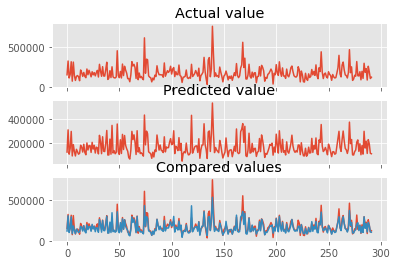

In [66]:
fig, axs = plt.subplots(3)
axs[0].set_title('Actual value')
axs[0].plot(vytest)
axs[1].set_title('Predicted value')
axs[1].plot(y_pred)
axs[2].set_title('Compared values')
axs[2].plot(vytest)
axs[2].plot(y_pred)
for ax in axs.flat:
    ax.label_outer()

In [52]:
Nmodel = Sequential()

# The Input Layer :
Nmodel.add(Dense(32, kernel_initializer='normal',input_dim = vxtrain.shape[1], activation='relu'))

# The Hidden Layers :
Nmodel.add(Dense(16, kernel_initializer='normal',activation='relu'))
# The Output Layer :
Nmodel.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
Nmodel.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
Nmodel.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2432      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 2,977
Trainable params: 2,977
Non-trainable params: 0
_________________________________________________________________


In [55]:
Nmodel.fit(vxtrain, vytrain, epochs=1500, batch_size=5, validation_split = 0.2, callbacks=callbacks_list)

Instructions for updating:
Use tf.cast instead.
Train on 934 samples, validate on 234 samples
Epoch 1/1500
934/934 [==============================] - 1s 1ms/step - loss: 155556.5624 - mean_absolute_error: 155556.5624 - val_loss: 92493.1143 - val_mean_absolute_error: 92493.1143

Epoch 00001: val_loss improved from inf to 92493.11427, saving model to Weights-001--92493.11427.hdf5
Epoch 2/1500
934/934 [==============================] - 0s 251us/step - loss: 54656.6546 - mean_absolute_error: 54656.6546 - val_loss: 41933.5023 - val_mean_absolute_error: 41933.5023

Epoch 00002: val_loss improved from 92493.11427 to 41933.50233, saving model to Weights-002--41933.50233.hdf5
Epoch 3/1500
934/934 [==============================] - 0s 254us/step - loss: 46622.9397 - mean_absolute_error: 46622.9397 - val_loss: 40553.8611 - val_mean_absolute_error: 40553.8611

Epoch 00003: val_loss improved from 41933.50233 to 40553.86112, saving model to Weights-003--40553.86112.hdf5
Epoch 4/1500
934/934 [=======

934/934 [==============================] - 0s 224us/step - loss: 28037.8011 - mean_absolute_error: 28037.8011 - val_loss: 23923.7190 - val_mean_absolute_error: 23923.7190

Epoch 00029: val_loss improved from 24057.05199 to 23923.71905, saving model to Weights-029--23923.71905.hdf5
Epoch 30/1500
934/934 [==============================] - 0s 215us/step - loss: 27914.0397 - mean_absolute_error: 27914.0397 - val_loss: 23958.4944 - val_mean_absolute_error: 23958.4944

Epoch 00030: val_loss did not improve from 23923.71905
Epoch 31/1500
934/934 [==============================] - 0s 198us/step - loss: 28042.2316 - mean_absolute_error: 28042.2316 - val_loss: 23854.9764 - val_mean_absolute_error: 23854.9764

Epoch 00031: val_loss improved from 23923.71905 to 23854.97645, saving model to Weights-031--23854.97645.hdf5
Epoch 32/1500
934/934 [==============================] - 0s 210us/step - loss: 28017.8571 - mean_absolute_error: 28017.8571 - val_loss: 23865.7031 - val_mean_absolute_error: 23865.7

934/934 [==============================] - 0s 214us/step - loss: 26968.3696 - mean_absolute_error: 26968.3696 - val_loss: 23532.7162 - val_mean_absolute_error: 23532.7162

Epoch 00094: val_loss did not improve from 23337.92275
Epoch 95/1500
934/934 [==============================] - 0s 203us/step - loss: 26981.3456 - mean_absolute_error: 26981.3456 - val_loss: 23589.9703 - val_mean_absolute_error: 23589.9703

Epoch 00095: val_loss did not improve from 23337.92275
Epoch 96/1500
934/934 [==============================] - 0s 207us/step - loss: 27036.5081 - mean_absolute_error: 27036.5081 - val_loss: 23741.0685 - val_mean_absolute_error: 23741.0685

Epoch 00096: val_loss did not improve from 23337.92275
Epoch 97/1500
934/934 [==============================] - 0s 204us/step - loss: 26958.2280 - mean_absolute_error: 26958.2280 - val_loss: 23651.3555 - val_mean_absolute_error: 23651.3555

Epoch 00097: val_loss did not improve from 23337.92275
Epoch 98/1500
934/934 [===========================

934/934 [==============================] - ETA: 0s - loss: 26509.0961 - mean_absolute_error: 26509.096 - 0s 253us/step - loss: 26472.1575 - mean_absolute_error: 26472.1575 - val_loss: 23254.1410 - val_mean_absolute_error: 23254.1410

Epoch 00127: val_loss did not improve from 23084.58385
Epoch 128/1500
934/934 [==============================] - 0s 208us/step - loss: 26594.9031 - mean_absolute_error: 26594.9031 - val_loss: 23163.7208 - val_mean_absolute_error: 23163.7208

Epoch 00128: val_loss did not improve from 23084.58385
Epoch 129/1500
934/934 [==============================] - 0s 198us/step - loss: 26399.2189 - mean_absolute_error: 26399.2189 - val_loss: 23379.8571 - val_mean_absolute_error: 23379.8571

Epoch 00129: val_loss did not improve from 23084.58385
Epoch 130/1500
934/934 [==============================] - 0s 200us/step - loss: 26429.9275 - mean_absolute_error: 26429.9275 - val_loss: 23570.1934 - val_mean_absolute_error: 23570.1934

Epoch 00130: val_loss did not improve fr

934/934 [==============================] - 0s 241us/step - loss: 26299.5041 - mean_absolute_error: 26299.5041 - val_loss: 23343.8323 - val_mean_absolute_error: 23343.8323

Epoch 00159: val_loss did not improve from 22461.20008
Epoch 160/1500
934/934 [==============================] - 0s 259us/step - loss: 25966.9045 - mean_absolute_error: 25966.9045 - val_loss: 22637.8432 - val_mean_absolute_error: 22637.8432

Epoch 00160: val_loss did not improve from 22461.20008
Epoch 161/1500
934/934 [==============================] - 0s 217us/step - loss: 25824.0226 - mean_absolute_error: 25824.0226 - val_loss: 22866.4161 - val_mean_absolute_error: 22866.4161

Epoch 00161: val_loss did not improve from 22461.20008
Epoch 162/1500
934/934 [==============================] - 0s 190us/step - loss: 25737.1721 - mean_absolute_error: 25737.1721 - val_loss: 22507.3551 - val_mean_absolute_error: 22507.3551

Epoch 00162: val_loss did not improve from 22461.20008
Epoch 163/1500
934/934 [=======================


Epoch 00191: val_loss improved from 21832.62651 to 21784.40095, saving model to Weights-191--21784.40095.hdf5
Epoch 192/1500
934/934 [==============================] - 0s 231us/step - loss: 24825.0745 - mean_absolute_error: 24825.0745 - val_loss: 22938.8288 - val_mean_absolute_error: 22938.8288

Epoch 00192: val_loss did not improve from 21784.40095
Epoch 193/1500
934/934 [==============================] - 0s 205us/step - loss: 24803.4272 - mean_absolute_error: 24803.4272 - val_loss: 22338.4405 - val_mean_absolute_error: 22338.4405

Epoch 00193: val_loss did not improve from 21784.40095
Epoch 194/1500
934/934 [==============================] - 0s 205us/step - loss: 24863.8233 - mean_absolute_error: 24863.8233 - val_loss: 21833.3823 - val_mean_absolute_error: 21833.3823

Epoch 00194: val_loss did not improve from 21784.40095
Epoch 195/1500
934/934 [==============================] - 0s 217us/step - loss: 25119.7415 - mean_absolute_error: 25119.7415 - val_loss: 22384.0197 - val_mean_abso

934/934 [==============================] - 0s 195us/step - loss: 23533.1106 - mean_absolute_error: 23533.1106 - val_loss: 21762.4367 - val_mean_absolute_error: 21762.4367

Epoch 00256: val_loss did not improve from 20943.15647
Epoch 257/1500
934/934 [==============================] - 0s 201us/step - loss: 23564.0398 - mean_absolute_error: 23564.0398 - val_loss: 20859.9143 - val_mean_absolute_error: 20859.9143

Epoch 00257: val_loss improved from 20943.15647 to 20859.91429, saving model to Weights-257--20859.91429.hdf5
Epoch 258/1500
934/934 [==============================] - 0s 219us/step - loss: 23664.3846 - mean_absolute_error: 23664.3846 - val_loss: 21163.3240 - val_mean_absolute_error: 21163.3240

Epoch 00258: val_loss did not improve from 20859.91429
Epoch 259/1500
934/934 [==============================] - 0s 211us/step - loss: 23513.9412 - mean_absolute_error: 23513.9412 - val_loss: 20780.9406 - val_mean_absolute_error: 20780.9406

Epoch 00259: val_loss improved from 20859.91429


Epoch 00286: val_loss improved from 19936.46337 to 19781.83063, saving model to Weights-286--19781.83063.hdf5
Epoch 287/1500
934/934 [==============================] - 0s 245us/step - loss: 22597.4749 - mean_absolute_error: 22597.4749 - val_loss: 19961.3024 - val_mean_absolute_error: 19961.3024

Epoch 00287: val_loss did not improve from 19781.83063
Epoch 288/1500
934/934 [==============================] - 0s 229us/step - loss: 22683.7254 - mean_absolute_error: 22683.7254 - val_loss: 19895.9510 - val_mean_absolute_error: 19895.9510

Epoch 00288: val_loss did not improve from 19781.83063
Epoch 289/1500
934/934 [==============================] - 0s 241us/step - loss: 22475.5812 - mean_absolute_error: 22475.5812 - val_loss: 22048.0993 - val_mean_absolute_error: 22048.0993

Epoch 00289: val_loss did not improve from 19781.83063
Epoch 290/1500
934/934 [==============================] - 0s 228us/step - loss: 22679.4413 - mean_absolute_error: 22679.4413 - val_loss: 19680.2840 - val_mean_abso


Epoch 00318: val_loss did not improve from 18953.37862
Epoch 319/1500
934/934 [==============================] - 0s 211us/step - loss: 21760.3975 - mean_absolute_error: 21760.3975 - val_loss: 20160.1713 - val_mean_absolute_error: 20160.1713

Epoch 00319: val_loss did not improve from 18953.37862
Epoch 320/1500
934/934 [==============================] - 0s 208us/step - loss: 21994.1688 - mean_absolute_error: 21994.1688 - val_loss: 19483.5831 - val_mean_absolute_error: 19483.5831

Epoch 00320: val_loss did not improve from 18953.37862
Epoch 321/1500
934/934 [==============================] - 0s 204us/step - loss: 22073.9425 - mean_absolute_error: 22073.9425 - val_loss: 19035.0978 - val_mean_absolute_error: 19035.0978

Epoch 00321: val_loss did not improve from 18953.37862
Epoch 322/1500
934/934 [==============================] - 0s 217us/step - loss: 21849.7289 - mean_absolute_error: 21849.7289 - val_loss: 19153.7057 - val_mean_absolute_error: 19153.7057

Epoch 00322: val_loss did not i

934/934 [==============================] - 0s 219us/step - loss: 20431.4642 - mean_absolute_error: 20431.4642 - val_loss: 19546.4353 - val_mean_absolute_error: 19546.4353

Epoch 00383: val_loss did not improve from 18179.51845
Epoch 384/1500
934/934 [==============================] - 0s 206us/step - loss: 20501.2983 - mean_absolute_error: 20501.2983 - val_loss: 18141.6400 - val_mean_absolute_error: 18141.6400

Epoch 00384: val_loss improved from 18179.51845 to 18141.64002, saving model to Weights-384--18141.64002.hdf5
Epoch 385/1500
934/934 [==============================] - 0s 202us/step - loss: 20931.3426 - mean_absolute_error: 20931.3426 - val_loss: 18266.5127 - val_mean_absolute_error: 18266.5127

Epoch 00385: val_loss did not improve from 18141.64002
Epoch 386/1500
934/934 [==============================] - 0s 216us/step - loss: 20719.1435 - mean_absolute_error: 20719.1435 - val_loss: 18461.5419 - val_mean_absolute_error: 18461.5419

Epoch 00386: val_loss did not improve from 1814

934/934 [==============================] - 0s 193us/step - loss: 19586.9846 - mean_absolute_error: 19586.9846 - val_loss: 18015.6393 - val_mean_absolute_error: 18015.6393

Epoch 00449: val_loss did not improve from 17825.80750
Epoch 450/1500
934/934 [==============================] - 0s 194us/step - loss: 19465.9808 - mean_absolute_error: 19465.9808 - val_loss: 17794.6136 - val_mean_absolute_error: 17794.6136

Epoch 00450: val_loss improved from 17825.80750 to 17794.61359, saving model to Weights-450--17794.61359.hdf5
Epoch 451/1500
934/934 [==============================] - 0s 212us/step - loss: 19695.2554 - mean_absolute_error: 19695.2554 - val_loss: 18182.7891 - val_mean_absolute_error: 18182.7891

Epoch 00451: val_loss did not improve from 17794.61359
Epoch 452/1500
934/934 [==============================] - 0s 200us/step - loss: 19299.5064 - mean_absolute_error: 19299.5064 - val_loss: 17922.1858 - val_mean_absolute_error: 17922.1858

Epoch 00452: val_loss did not improve from 1779

934/934 [==============================] - 0s 206us/step - loss: 18923.5134 - mean_absolute_error: 18923.5134 - val_loss: 17768.3324 - val_mean_absolute_error: 17768.3324

Epoch 00515: val_loss did not improve from 17703.32275
Epoch 516/1500
934/934 [==============================] - 0s 198us/step - loss: 18671.7243 - mean_absolute_error: 18671.7243 - val_loss: 18599.8332 - val_mean_absolute_error: 18599.8332

Epoch 00516: val_loss did not improve from 17703.32275
Epoch 517/1500
934/934 [==============================] - 0s 202us/step - loss: 18936.5257 - mean_absolute_error: 18936.5257 - val_loss: 17987.0521 - val_mean_absolute_error: 17987.0521

Epoch 00517: val_loss did not improve from 17703.32275
Epoch 518/1500
934/934 [==============================] - 0s 196us/step - loss: 19048.5885 - mean_absolute_error: 19048.5885 - val_loss: 17957.9905 - val_mean_absolute_error: 17957.9905

Epoch 00518: val_loss did not improve from 17703.32275
Epoch 519/1500
934/934 [=======================

934/934 [==============================] - 0s 195us/step - loss: 18152.4634 - mean_absolute_error: 18152.4634 - val_loss: 18085.6387 - val_mean_absolute_error: 18085.6387

Epoch 00582: val_loss did not improve from 17663.73749
Epoch 583/1500
934/934 [==============================] - 0s 194us/step - loss: 18191.6321 - mean_absolute_error: 18191.6321 - val_loss: 18064.7811 - val_mean_absolute_error: 18064.7811

Epoch 00583: val_loss did not improve from 17663.73749
Epoch 584/1500
934/934 [==============================] - 0s 193us/step - loss: 18342.9722 - mean_absolute_error: 18342.9722 - val_loss: 17722.3116 - val_mean_absolute_error: 17722.3116

Epoch 00584: val_loss did not improve from 17663.73749
Epoch 585/1500
934/934 [==============================] - 0s 195us/step - loss: 18334.9599 - mean_absolute_error: 18334.9599 - val_loss: 17919.8120 - val_mean_absolute_error: 17919.8120

Epoch 00585: val_loss did not improve from 17663.73749
Epoch 586/1500
934/934 [=======================

934/934 [==============================] - 0s 203us/step - loss: 17938.5209 - mean_absolute_error: 17938.5209 - val_loss: 17779.4591 - val_mean_absolute_error: 17779.4591

Epoch 00616: val_loss did not improve from 17663.73749
Epoch 617/1500
934/934 [==============================] - 0s 201us/step - loss: 18241.5807 - mean_absolute_error: 18241.5807 - val_loss: 17743.1713 - val_mean_absolute_error: 17743.1713

Epoch 00617: val_loss did not improve from 17663.73749
Epoch 618/1500
934/934 [==============================] - 0s 206us/step - loss: 17894.5301 - mean_absolute_error: 17894.5301 - val_loss: 18085.1518 - val_mean_absolute_error: 18085.1518

Epoch 00618: val_loss did not improve from 17663.73749
Epoch 619/1500
934/934 [==============================] - 0s 194us/step - loss: 17969.1196 - mean_absolute_error: 17969.1196 - val_loss: 17776.0916 - val_mean_absolute_error: 17776.0916

Epoch 00619: val_loss did not improve from 17663.73749
Epoch 620/1500
934/934 [=======================


Epoch 00649: val_loss did not improve from 17663.73749
Epoch 650/1500
934/934 [==============================] - 0s 198us/step - loss: 18206.3412 - mean_absolute_error: 18206.3412 - val_loss: 17927.2981 - val_mean_absolute_error: 17927.2981

Epoch 00650: val_loss did not improve from 17663.73749
Epoch 651/1500
934/934 [==============================] - 0s 196us/step - loss: 17954.3407 - mean_absolute_error: 17954.3407 - val_loss: 19414.8185 - val_mean_absolute_error: 19414.8185

Epoch 00651: val_loss did not improve from 17663.73749
Epoch 652/1500
934/934 [==============================] - 0s 191us/step - loss: 18259.5125 - mean_absolute_error: 18259.5125 - val_loss: 17802.6037 - val_mean_absolute_error: 17802.6037

Epoch 00652: val_loss did not improve from 17663.73749
Epoch 653/1500
934/934 [==============================] - 0s 191us/step - loss: 18055.5785 - mean_absolute_error: 18055.5785 - val_loss: 20475.3806 - val_mean_absolute_error: 20475.3806

Epoch 00653: val_loss did not i


Epoch 00683: val_loss did not improve from 17663.73749
Epoch 684/1500
934/934 [==============================] - 0s 193us/step - loss: 17898.7281 - mean_absolute_error: 17898.7281 - val_loss: 17582.7298 - val_mean_absolute_error: 17582.7298

Epoch 00684: val_loss improved from 17663.73749 to 17582.72983, saving model to Weights-684--17582.72983.hdf5
Epoch 685/1500
934/934 [==============================] - 0s 226us/step - loss: 17714.6993 - mean_absolute_error: 17714.6993 - val_loss: 17807.4554 - val_mean_absolute_error: 17807.4554

Epoch 00685: val_loss did not improve from 17582.72983
Epoch 686/1500
934/934 [==============================] - 0s 232us/step - loss: 17918.4844 - mean_absolute_error: 17918.4844 - val_loss: 18320.8800 - val_mean_absolute_error: 18320.8800

Epoch 00686: val_loss did not improve from 17582.72983
Epoch 687/1500
934/934 [==============================] - 0s 218us/step - loss: 17712.5008 - mean_absolute_error: 17712.5008 - val_loss: 18340.3806 - val_mean_abso

934/934 [==============================] - 0s 194us/step - loss: 17137.7782 - mean_absolute_error: 17137.7782 - val_loss: 17581.6642 - val_mean_absolute_error: 17581.6642

Epoch 00751: val_loss did not improve from 17495.20306
Epoch 752/1500
934/934 [==============================] - 0s 192us/step - loss: 17367.7825 - mean_absolute_error: 17367.7825 - val_loss: 17595.5365 - val_mean_absolute_error: 17595.5365

Epoch 00752: val_loss did not improve from 17495.20306
Epoch 753/1500
934/934 [==============================] - 0s 193us/step - loss: 17481.4518 - mean_absolute_error: 17481.4518 - val_loss: 17583.5588 - val_mean_absolute_error: 17583.5588

Epoch 00753: val_loss did not improve from 17495.20306
Epoch 754/1500
934/934 [==============================] - 0s 191us/step - loss: 17464.8974 - mean_absolute_error: 17464.8974 - val_loss: 17661.1954 - val_mean_absolute_error: 17661.1954

Epoch 00754: val_loss did not improve from 17495.20306
Epoch 755/1500
934/934 [=======================


Epoch 00784: val_loss did not improve from 17425.57160
Epoch 785/1500
934/934 [==============================] - 0s 192us/step - loss: 17482.8810 - mean_absolute_error: 17482.8810 - val_loss: 17779.0521 - val_mean_absolute_error: 17779.0521

Epoch 00785: val_loss did not improve from 17425.57160
Epoch 786/1500
934/934 [==============================] - 0s 198us/step - loss: 17430.0740 - mean_absolute_error: 17430.0740 - val_loss: 19464.1110 - val_mean_absolute_error: 19464.1110

Epoch 00786: val_loss did not improve from 17425.57160
Epoch 787/1500
934/934 [==============================] - 0s 192us/step - loss: 17207.4748 - mean_absolute_error: 17207.4748 - val_loss: 18269.1905 - val_mean_absolute_error: 18269.1905

Epoch 00787: val_loss did not improve from 17425.57160
Epoch 788/1500
934/934 [==============================] - 0s 192us/step - loss: 17360.3149 - mean_absolute_error: 17360.3149 - val_loss: 17711.1942 - val_mean_absolute_error: 17711.1942

Epoch 00788: val_loss did not i


Epoch 00818: val_loss did not improve from 17425.57160
Epoch 819/1500
934/934 [==============================] - 0s 196us/step - loss: 16902.5292 - mean_absolute_error: 16902.5292 - val_loss: 19247.0924 - val_mean_absolute_error: 19247.0924

Epoch 00819: val_loss did not improve from 17425.57160
Epoch 820/1500
934/934 [==============================] - 0s 196us/step - loss: 17312.3995 - mean_absolute_error: 17312.3995 - val_loss: 17617.3819 - val_mean_absolute_error: 17617.3819

Epoch 00820: val_loss did not improve from 17425.57160
Epoch 821/1500
934/934 [==============================] - 0s 192us/step - loss: 17493.6925 - mean_absolute_error: 17493.6925 - val_loss: 17788.8881 - val_mean_absolute_error: 17788.8881

Epoch 00821: val_loss did not improve from 17425.57160
Epoch 822/1500
934/934 [==============================] - 0s 192us/step - loss: 17226.6563 - mean_absolute_error: 17226.6563 - val_loss: 18389.3257 - val_mean_absolute_error: 18389.3257

Epoch 00822: val_loss did not i

934/934 [==============================] - 0s 195us/step - loss: 16555.6855 - mean_absolute_error: 16555.6855 - val_loss: 18600.4275 - val_mean_absolute_error: 18600.4275

Epoch 00886: val_loss did not improve from 17397.89172
Epoch 887/1500
934/934 [==============================] - 0s 212us/step - loss: 17031.7293 - mean_absolute_error: 17031.7293 - val_loss: 17660.4865 - val_mean_absolute_error: 17660.4865

Epoch 00887: val_loss did not improve from 17397.89172
Epoch 888/1500
934/934 [==============================] - 0s 190us/step - loss: 17205.2432 - mean_absolute_error: 17205.2432 - val_loss: 18224.1696 - val_mean_absolute_error: 18224.1696

Epoch 00888: val_loss did not improve from 17397.89172
Epoch 889/1500
934/934 [==============================] - 0s 200us/step - loss: 16608.1825 - mean_absolute_error: 16608.1825 - val_loss: 18055.6871 - val_mean_absolute_error: 18055.6871

Epoch 00889: val_loss did not improve from 17397.89172
Epoch 890/1500
934/934 [=======================

934/934 [==============================] - 0s 202us/step - loss: 16982.4013 - mean_absolute_error: 16982.4013 - val_loss: 19405.6293 - val_mean_absolute_error: 19405.6293

Epoch 00920: val_loss did not improve from 17397.89172
Epoch 921/1500
934/934 [==============================] - 0s 198us/step - loss: 16877.2697 - mean_absolute_error: 16877.2697 - val_loss: 17555.1878 - val_mean_absolute_error: 17555.1878

Epoch 00921: val_loss did not improve from 17397.89172
Epoch 922/1500
934/934 [==============================] - 0s 200us/step - loss: 16570.9269 - mean_absolute_error: 16570.9269 - val_loss: 17542.7061 - val_mean_absolute_error: 17542.7061

Epoch 00922: val_loss did not improve from 17397.89172
Epoch 923/1500
934/934 [==============================] - 0s 206us/step - loss: 16390.3366 - mean_absolute_error: 16390.3366 - val_loss: 18362.6348 - val_mean_absolute_error: 18362.6348

Epoch 00923: val_loss did not improve from 17397.89172
Epoch 924/1500
934/934 [=======================

934/934 [==============================] - 0s 195us/step - loss: 16185.7304 - mean_absolute_error: 16185.7304 - val_loss: 17954.6306 - val_mean_absolute_error: 17954.6306

Epoch 00987: val_loss did not improve from 17362.58956
Epoch 988/1500
934/934 [==============================] - 0s 199us/step - loss: 16328.3591 - mean_absolute_error: 16328.3591 - val_loss: 17548.1225 - val_mean_absolute_error: 17548.1225

Epoch 00988: val_loss did not improve from 17362.58956
Epoch 989/1500
934/934 [==============================] - 0s 201us/step - loss: 16611.3571 - mean_absolute_error: 16611.3571 - val_loss: 18325.3059 - val_mean_absolute_error: 18325.3059

Epoch 00989: val_loss did not improve from 17362.58956
Epoch 990/1500
934/934 [==============================] - 0s 194us/step - loss: 16442.8413 - mean_absolute_error: 16442.8413 - val_loss: 17819.4077 - val_mean_absolute_error: 17819.4077

Epoch 00990: val_loss did not improve from 17362.58956
Epoch 991/1500
934/934 [=======================

934/934 [==============================] - 0s 196us/step - loss: 16125.4102 - mean_absolute_error: 16125.4102 - val_loss: 19552.0321 - val_mean_absolute_error: 19552.0321

Epoch 01021: val_loss did not improve from 17362.58956
Epoch 1022/1500
934/934 [==============================] - 0s 190us/step - loss: 16438.1461 - mean_absolute_error: 16438.1461 - val_loss: 17968.8440 - val_mean_absolute_error: 17968.8440

Epoch 01022: val_loss did not improve from 17362.58956
Epoch 1023/1500
934/934 [==============================] - 0s 191us/step - loss: 16268.2223 - mean_absolute_error: 16268.2223 - val_loss: 17876.1039 - val_mean_absolute_error: 17876.1039

Epoch 01023: val_loss did not improve from 17362.58956
Epoch 1024/1500
934/934 [==============================] - 0s 202us/step - loss: 16093.6192 - mean_absolute_error: 16093.6192 - val_loss: 18975.8712 - val_mean_absolute_error: 18975.8712

Epoch 01024: val_loss did not improve from 17362.58956
Epoch 1025/1500
934/934 [===================

934/934 [==============================] - 0s 192us/step - loss: 15384.8337 - mean_absolute_error: 15384.8337 - val_loss: 18369.7499 - val_mean_absolute_error: 18369.7499

Epoch 01088: val_loss did not improve from 17362.58956
Epoch 1089/1500
934/934 [==============================] - 0s 193us/step - loss: 15845.0286 - mean_absolute_error: 15845.0286 - val_loss: 18206.6406 - val_mean_absolute_error: 18206.6406

Epoch 01089: val_loss did not improve from 17362.58956
Epoch 1090/1500
934/934 [==============================] - 0s 210us/step - loss: 15530.2649 - mean_absolute_error: 15530.2649 - val_loss: 18207.8234 - val_mean_absolute_error: 18207.8234

Epoch 01090: val_loss did not improve from 17362.58956
Epoch 1091/1500
934/934 [==============================] - 0s 188us/step - loss: 15570.7654 - mean_absolute_error: 15570.7654 - val_loss: 18717.1536 - val_mean_absolute_error: 18717.1536

Epoch 01091: val_loss did not improve from 17362.58956
Epoch 1092/1500
934/934 [===================

934/934 [==============================] - 0s 193us/step - loss: 15913.1163 - mean_absolute_error: 15913.1163 - val_loss: 17798.0586 - val_mean_absolute_error: 17798.0586

Epoch 01122: val_loss did not improve from 17362.58956
Epoch 1123/1500
934/934 [==============================] - 0s 194us/step - loss: 15320.6340 - mean_absolute_error: 15320.6340 - val_loss: 18368.0245 - val_mean_absolute_error: 18368.0245

Epoch 01123: val_loss did not improve from 17362.58956
Epoch 1124/1500
934/934 [==============================] - 0s 194us/step - loss: 15461.7128 - mean_absolute_error: 15461.7128 - val_loss: 18569.2488 - val_mean_absolute_error: 18569.2488

Epoch 01124: val_loss did not improve from 17362.58956
Epoch 1125/1500
934/934 [==============================] - 0s 189us/step - loss: 15879.0557 - mean_absolute_error: 15879.0557 - val_loss: 18487.2387 - val_mean_absolute_error: 18487.2387

Epoch 01125: val_loss did not improve from 17362.58956
Epoch 1126/1500
934/934 [===================

934/934 [==============================] - 0s 195us/step - loss: 15581.1477 - mean_absolute_error: 15581.1477 - val_loss: 17779.3447 - val_mean_absolute_error: 17779.3447

Epoch 01156: val_loss did not improve from 17362.58956
Epoch 1157/1500
934/934 [==============================] - 0s 194us/step - loss: 15656.3081 - mean_absolute_error: 15656.3081 - val_loss: 18643.2402 - val_mean_absolute_error: 18643.2402

Epoch 01157: val_loss did not improve from 17362.58956
Epoch 1158/1500
934/934 [==============================] - 0s 201us/step - loss: 15565.8167 - mean_absolute_error: 15565.8167 - val_loss: 17853.5871 - val_mean_absolute_error: 17853.5871

Epoch 01158: val_loss did not improve from 17362.58956
Epoch 1159/1500
934/934 [==============================] - 0s 206us/step - loss: 15298.4101 - mean_absolute_error: 15298.4101 - val_loss: 19218.2951 - val_mean_absolute_error: 19218.2951

Epoch 01159: val_loss did not improve from 17362.58956
Epoch 1160/1500
934/934 [===================

934/934 [==============================] - 0s 192us/step - loss: 14859.1353 - mean_absolute_error: 14859.1353 - val_loss: 18262.8764 - val_mean_absolute_error: 18262.8764

Epoch 01190: val_loss did not improve from 17362.58956
Epoch 1191/1500
934/934 [==============================] - 0s 214us/step - loss: 15168.2881 - mean_absolute_error: 15168.2881 - val_loss: 18009.0603 - val_mean_absolute_error: 18009.0603

Epoch 01191: val_loss did not improve from 17362.58956
Epoch 1192/1500
934/934 [==============================] - 0s 186us/step - loss: 14955.6453 - mean_absolute_error: 14955.6453 - val_loss: 17648.8833 - val_mean_absolute_error: 17648.8833

Epoch 01192: val_loss did not improve from 17362.58956
Epoch 1193/1500
934/934 [==============================] - 0s 179us/step - loss: 14972.4066 - mean_absolute_error: 14972.4066 - val_loss: 18130.7594 - val_mean_absolute_error: 18130.7594

Epoch 01193: val_loss did not improve from 17362.58956
Epoch 1194/1500
934/934 [===================

934/934 [==============================] - 0s 199us/step - loss: 15053.7378 - mean_absolute_error: 15053.7378 - val_loss: 18127.3093 - val_mean_absolute_error: 18127.3093

Epoch 01224: val_loss did not improve from 17362.58956
Epoch 1225/1500
934/934 [==============================] - 0s 192us/step - loss: 15452.2835 - mean_absolute_error: 15452.2835 - val_loss: 18102.6785 - val_mean_absolute_error: 18102.6785

Epoch 01225: val_loss did not improve from 17362.58956
Epoch 1226/1500
934/934 [==============================] - 0s 192us/step - loss: 15473.9975 - mean_absolute_error: 15473.9975 - val_loss: 17885.9552 - val_mean_absolute_error: 17885.9552

Epoch 01226: val_loss did not improve from 17362.58956
Epoch 1227/1500
934/934 [==============================] - 0s 189us/step - loss: 14972.3548 - mean_absolute_error: 14972.3548 - val_loss: 18176.4014 - val_mean_absolute_error: 18176.4014

Epoch 01227: val_loss did not improve from 17362.58956
Epoch 1228/1500
934/934 [===================

934/934 [==============================] - 0s 202us/step - loss: 14950.7041 - mean_absolute_error: 14950.7041 - val_loss: 18588.0181 - val_mean_absolute_error: 18588.0181

Epoch 01258: val_loss did not improve from 17362.58956
Epoch 1259/1500
934/934 [==============================] - 0s 202us/step - loss: 15122.5467 - mean_absolute_error: 15122.5467 - val_loss: 18219.9457 - val_mean_absolute_error: 18219.9457

Epoch 01259: val_loss did not improve from 17362.58956
Epoch 1260/1500
934/934 [==============================] - 0s 202us/step - loss: 15055.1496 - mean_absolute_error: 15055.1496 - val_loss: 19408.0244 - val_mean_absolute_error: 19408.0244

Epoch 01260: val_loss did not improve from 17362.58956
Epoch 1261/1500
934/934 [==============================] - 0s 200us/step - loss: 14799.8583 - mean_absolute_error: 14799.8583 - val_loss: 18921.3634 - val_mean_absolute_error: 18921.3634

Epoch 01261: val_loss did not improve from 17362.58956
Epoch 1262/1500
934/934 [===================

934/934 [==============================] - 0s 193us/step - loss: 15795.3716 - mean_absolute_error: 15795.3716 - val_loss: 18176.1279 - val_mean_absolute_error: 18176.1279

Epoch 01292: val_loss did not improve from 17362.58956
Epoch 1293/1500
934/934 [==============================] - 0s 192us/step - loss: 15302.3104 - mean_absolute_error: 15302.3104 - val_loss: 17886.1898 - val_mean_absolute_error: 17886.1898

Epoch 01293: val_loss did not improve from 17362.58956
Epoch 1294/1500
934/934 [==============================] - 0s 193us/step - loss: 14823.5655 - mean_absolute_error: 14823.5655 - val_loss: 18297.2094 - val_mean_absolute_error: 18297.2094

Epoch 01294: val_loss did not improve from 17362.58956
Epoch 1295/1500
934/934 [==============================] - 0s 194us/step - loss: 14763.3631 - mean_absolute_error: 14763.3631 - val_loss: 17768.9780 - val_mean_absolute_error: 17768.9780

Epoch 01295: val_loss did not improve from 17362.58956
Epoch 1296/1500
934/934 [===================

934/934 [==============================] - 0s 198us/step - loss: 14992.1031 - mean_absolute_error: 14992.1031 - val_loss: 19541.5640 - val_mean_absolute_error: 19541.5640

Epoch 01326: val_loss did not improve from 17362.58956
Epoch 1327/1500
934/934 [==============================] - 0s 194us/step - loss: 14589.7717 - mean_absolute_error: 14589.7717 - val_loss: 18856.2871 - val_mean_absolute_error: 18856.2871

Epoch 01327: val_loss did not improve from 17362.58956
Epoch 1328/1500
934/934 [==============================] - 0s 210us/step - loss: 14373.6111 - mean_absolute_error: 14373.6111 - val_loss: 18189.8625 - val_mean_absolute_error: 18189.8625

Epoch 01328: val_loss did not improve from 17362.58956
Epoch 1329/1500
934/934 [==============================] - 0s 193us/step - loss: 14262.2537 - mean_absolute_error: 14262.2537 - val_loss: 18195.2158 - val_mean_absolute_error: 18195.2158

Epoch 01329: val_loss did not improve from 17362.58956
Epoch 1330/1500
934/934 [===================

934/934 [==============================] - 0s 198us/step - loss: 14691.1933 - mean_absolute_error: 14691.1933 - val_loss: 17789.9064 - val_mean_absolute_error: 17789.9064

Epoch 01360: val_loss did not improve from 17362.58956
Epoch 1361/1500
934/934 [==============================] - 0s 196us/step - loss: 14843.6401 - mean_absolute_error: 14843.6401 - val_loss: 19298.5804 - val_mean_absolute_error: 19298.5804

Epoch 01361: val_loss did not improve from 17362.58956
Epoch 1362/1500
934/934 [==============================] - 0s 196us/step - loss: 14723.5363 - mean_absolute_error: 14723.5363 - val_loss: 19284.5918 - val_mean_absolute_error: 19284.5918

Epoch 01362: val_loss did not improve from 17362.58956
Epoch 1363/1500
934/934 [==============================] - 0s 196us/step - loss: 15260.2582 - mean_absolute_error: 15260.2582 - val_loss: 18042.1929 - val_mean_absolute_error: 18042.1929

Epoch 01363: val_loss did not improve from 17362.58956
Epoch 1364/1500
934/934 [===================

934/934 [==============================] - 0s 199us/step - loss: 14391.4184 - mean_absolute_error: 14391.4184 - val_loss: 18066.9288 - val_mean_absolute_error: 18066.9288

Epoch 01394: val_loss did not improve from 17362.58956
Epoch 1395/1500
934/934 [==============================] - 0s 192us/step - loss: 14399.1908 - mean_absolute_error: 14399.1908 - val_loss: 17921.2886 - val_mean_absolute_error: 17921.2886

Epoch 01395: val_loss did not improve from 17362.58956
Epoch 1396/1500
934/934 [==============================] - 0s 191us/step - loss: 14311.2162 - mean_absolute_error: 14311.2162 - val_loss: 17678.1292 - val_mean_absolute_error: 17678.1292

Epoch 01396: val_loss did not improve from 17362.58956
Epoch 1397/1500
934/934 [==============================] - 0s 199us/step - loss: 14557.1574 - mean_absolute_error: 14557.1574 - val_loss: 18040.4903 - val_mean_absolute_error: 18040.4903

Epoch 01397: val_loss did not improve from 17362.58956
Epoch 1398/1500
934/934 [===================

934/934 [==============================] - 0s 204us/step - loss: 14305.4909 - mean_absolute_error: 14305.4909 - val_loss: 17869.2288 - val_mean_absolute_error: 17869.2288

Epoch 01428: val_loss did not improve from 17362.58956
Epoch 1429/1500
934/934 [==============================] - 0s 195us/step - loss: 14190.0369 - mean_absolute_error: 14190.0369 - val_loss: 18826.2100 - val_mean_absolute_error: 18826.2100

Epoch 01429: val_loss did not improve from 17362.58956
Epoch 1430/1500
934/934 [==============================] - 0s 199us/step - loss: 14442.5281 - mean_absolute_error: 14442.5281 - val_loss: 18696.5167 - val_mean_absolute_error: 18696.5167

Epoch 01430: val_loss did not improve from 17362.58956
Epoch 1431/1500
934/934 [==============================] - 0s 196us/step - loss: 14628.0331 - mean_absolute_error: 14628.0331 - val_loss: 17814.7849 - val_mean_absolute_error: 17814.7849

Epoch 01431: val_loss did not improve from 17362.58956
Epoch 1432/1500
934/934 [===================

934/934 [==============================] - 0s 192us/step - loss: 14683.6471 - mean_absolute_error: 14683.6471 - val_loss: 17789.7188 - val_mean_absolute_error: 17789.7188

Epoch 01462: val_loss did not improve from 17362.58956
Epoch 1463/1500
934/934 [==============================] - 0s 193us/step - loss: 14354.3004 - mean_absolute_error: 14354.3004 - val_loss: 17943.9916 - val_mean_absolute_error: 17943.9916

Epoch 01463: val_loss did not improve from 17362.58956
Epoch 1464/1500
934/934 [==============================] - 0s 192us/step - loss: 13812.1452 - mean_absolute_error: 13812.1452 - val_loss: 18306.4771 - val_mean_absolute_error: 18306.4771

Epoch 01464: val_loss did not improve from 17362.58956
Epoch 1465/1500
934/934 [==============================] - 0s 191us/step - loss: 14014.0611 - mean_absolute_error: 14014.0611 - val_loss: 17921.5271 - val_mean_absolute_error: 17921.5271

Epoch 01465: val_loss did not improve from 17362.58956
Epoch 1466/1500
934/934 [===================

934/934 [==============================] - 0s 201us/step - loss: 14082.4177 - mean_absolute_error: 14082.4177 - val_loss: 18452.9886 - val_mean_absolute_error: 18452.9886

Epoch 01496: val_loss did not improve from 17362.58956
Epoch 1497/1500
934/934 [==============================] - 0s 199us/step - loss: 13867.2288 - mean_absolute_error: 13867.2288 - val_loss: 18079.4514 - val_mean_absolute_error: 18079.4514

Epoch 01497: val_loss did not improve from 17362.58956
Epoch 1498/1500
934/934 [==============================] - 0s 216us/step - loss: 13804.2990 - mean_absolute_error: 13804.2990 - val_loss: 18392.6888 - val_mean_absolute_error: 18392.6888

Epoch 01498: val_loss did not improve from 17362.58956
Epoch 1499/1500
934/934 [==============================] - 0s 206us/step - loss: 13781.3987 - mean_absolute_error: 13781.3987 - val_loss: 18145.3808 - val_mean_absolute_error: 18145.3808

Epoch 01499: val_loss did not improve from 17362.58956
Epoch 1500/1500
934/934 [===================

In [56]:
y_pred=Nmodel.predict(vxtest)
vytest= ytest.to_numpy()
print("Mean Absolute Error:", mean_absolute_error(vytest, y_pred))
print("Mean Squared Error:", mean_squared_error(vytest, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(vytest, y_pred))  )

Mean Absolute Error: 18403.49591984161
Mean Squared Error: 991444532.5245295
Root Mean Squared Error: 31487.21220629939


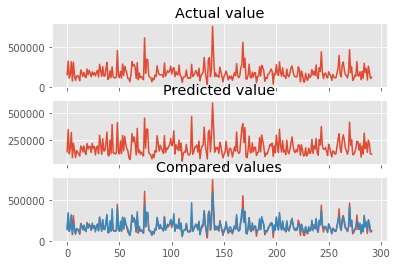

In [57]:
fig, axs = plt.subplots(3)
axs[0].set_title('Actual value')
axs[0].plot(vytest)
axs[1].set_title('Predicted value')
axs[1].plot(y_pred)
axs[2].set_title('Compared values')
axs[2].plot(vytest)
axs[2].plot(y_pred)
for ax in axs.flat:
    ax.label_outer()

## Start Here

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init

In [43]:
class tmodel(nn.Module):
    def __init__(self,begin_size):
        super(tmodel,self).__init__()
        self.fc1 = nn.Linear(begin_size,32)
        init.normal_(self.fc1.weight)
        self.fc2 = nn.Linear(32,16)
        init.normal_(self.fc2.weight)
        self.fc3 = nn.Linear(16,1)
        init.normal_(self.fc3.weight)
        
    def forward(self,x):
        y_pred = F.relu(self.fc1(x))
        y_pred = F.relu(self.fc2(y_pred))
        y_pred = self.fc3(y_pred)
        return y_pred
ntmodel = tmodel(vxtrain.shape[1])
print(ntmodel)

tmodel(
  (fc1): Linear(in_features=75, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)


In [44]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(ntmodel)

2977

In [45]:
new_size_fvytrain = np.resize(vytrain,(len(vytrain),1))
fvxtrain = vxtrain.astype(np.float32)
fvytrain = new_size_fvytrain.astype(np.float32)
tytrain = torch.from_numpy(fvytrain)
txtrain = torch.from_numpy(fvxtrain)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(ntmodel.parameters(), lr=1e-4)

In [46]:
datatrain = torch.utils.data.TensorDataset(txtrain,tytrain)

In [47]:
traindata=torch.utils.data.DataLoader(datatrain, batch_size=5, shuffle= True)
traindata

In [48]:
losses1 = []
for epoch in range(500):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(traindata, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = ntmodel(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 5 == 4:    # print every 5 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 5))
            running_loss = 0.0
    losses1.append(loss.item())
print('Finished Training')

[1,     5] loss: 302431.688
[1,    10] loss: 325006.581
[1,    15] loss: 327268.456
[1,    20] loss: 378571.612
[1,    25] loss: 343916.625
[1,    30] loss: 321093.441
[1,    35] loss: 308498.869
[1,    40] loss: 307248.881
[1,    45] loss: 323450.575
[1,    50] loss: 305739.731
[1,    55] loss: 317540.269
[1,    60] loss: 303218.856
[1,    65] loss: 326371.494
[1,    70] loss: 322308.612
[1,    75] loss: 322570.997
[1,    80] loss: 321693.066
[1,    85] loss: 349677.287
[1,    90] loss: 287463.300
[1,    95] loss: 291607.716
[1,   100] loss: 326606.956
[1,   105] loss: 355820.612
[1,   110] loss: 303786.291
[1,   115] loss: 310258.694
[1,   120] loss: 278722.791
[1,   125] loss: 309130.431
[1,   130] loss: 262698.416
[1,   135] loss: 318082.631
[1,   140] loss: 282002.544
[1,   145] loss: 314601.300
[1,   150] loss: 269959.378
[1,   155] loss: 295711.138
[1,   160] loss: 345128.112
[1,   165] loss: 296907.531
[1,   170] loss: 359560.081
[1,   175] loss: 263363.975
[1,   180] loss: 249

[8,     5] loss: 38529.490
[8,    10] loss: 59402.863
[8,    15] loss: 67580.952
[8,    20] loss: 61949.078
[8,    25] loss: 74067.317
[8,    30] loss: 38716.395
[8,    35] loss: 47584.982
[8,    40] loss: 32282.993
[8,    45] loss: 52860.812
[8,    50] loss: 70421.885
[8,    55] loss: 37803.438
[8,    60] loss: 54445.538
[8,    65] loss: 46915.732
[8,    70] loss: 34611.946
[8,    75] loss: 45330.779
[8,    80] loss: 59258.227
[8,    85] loss: 50395.728
[8,    90] loss: 77820.816
[8,    95] loss: 40341.695
[8,   100] loss: 42529.293
[8,   105] loss: 31484.521
[8,   110] loss: 53227.306
[8,   115] loss: 45322.289
[8,   120] loss: 48515.482
[8,   125] loss: 51339.731
[8,   130] loss: 40177.139
[8,   135] loss: 53387.088
[8,   140] loss: 31296.705
[8,   145] loss: 34195.280
[8,   150] loss: 58982.348
[8,   155] loss: 50516.983
[8,   160] loss: 41900.250
[8,   165] loss: 42154.250
[8,   170] loss: 73159.114
[8,   175] loss: 50566.242
[8,   180] loss: 60044.422
[8,   185] loss: 39125.346
[

[14,   180] loss: 43038.183
[14,   185] loss: 41412.987
[14,   190] loss: 36260.313
[14,   195] loss: 46065.561
[14,   200] loss: 46565.481
[14,   205] loss: 58010.753
[14,   210] loss: 46411.715
[14,   215] loss: 45468.027
[14,   220] loss: 47642.479
[14,   225] loss: 32630.967
[14,   230] loss: 32366.423
[15,     5] loss: 55314.541
[15,    10] loss: 39206.695
[15,    15] loss: 34072.953
[15,    20] loss: 41686.237
[15,    25] loss: 33005.177
[15,    30] loss: 41876.689
[15,    35] loss: 42916.934
[15,    40] loss: 44250.510
[15,    45] loss: 35477.893
[15,    50] loss: 49592.527
[15,    55] loss: 64915.695
[15,    60] loss: 32339.166
[15,    65] loss: 33606.839
[15,    70] loss: 45095.581
[15,    75] loss: 43158.746
[15,    80] loss: 72253.490
[15,    85] loss: 42053.069
[15,    90] loss: 45455.107
[15,    95] loss: 43421.326
[15,   100] loss: 35247.631
[15,   105] loss: 54329.957
[15,   110] loss: 36557.073
[15,   115] loss: 36373.920
[15,   120] loss: 60403.389
[15,   125] loss: 52

[21,   145] loss: 31946.324
[21,   150] loss: 40999.861
[21,   155] loss: 41332.935
[21,   160] loss: 39090.664
[21,   165] loss: 30573.324
[21,   170] loss: 32407.520
[21,   175] loss: 28235.217
[21,   180] loss: 51399.956
[21,   185] loss: 37896.845
[21,   190] loss: 43149.404
[21,   195] loss: 36850.372
[21,   200] loss: 33049.880
[21,   205] loss: 21799.756
[21,   210] loss: 29505.797
[21,   215] loss: 35568.318
[21,   220] loss: 25145.159
[21,   225] loss: 37463.527
[21,   230] loss: 52063.292
[22,     5] loss: 38482.213
[22,    10] loss: 27672.718
[22,    15] loss: 44010.842
[22,    20] loss: 32614.368
[22,    25] loss: 37473.883
[22,    30] loss: 41752.629
[22,    35] loss: 28275.724
[22,    40] loss: 41051.395
[22,    45] loss: 37982.180
[22,    50] loss: 36054.248
[22,    55] loss: 25309.370
[22,    60] loss: 25847.744
[22,    65] loss: 42550.523
[22,    70] loss: 34262.299
[22,    75] loss: 44871.290
[22,    80] loss: 29684.396
[22,    85] loss: 37559.406
[22,    90] loss: 28

[28,   175] loss: 27734.196
[28,   180] loss: 37273.591
[28,   185] loss: 50315.718
[28,   190] loss: 36214.043
[28,   195] loss: 35584.120
[28,   200] loss: 31908.869
[28,   205] loss: 31125.578
[28,   210] loss: 35256.746
[28,   215] loss: 42340.693
[28,   220] loss: 33773.304
[28,   225] loss: 26505.222
[28,   230] loss: 34710.288
[29,     5] loss: 32372.105
[29,    10] loss: 34053.012
[29,    15] loss: 24667.892
[29,    20] loss: 26651.885
[29,    25] loss: 37786.178
[29,    30] loss: 39505.205
[29,    35] loss: 28305.799
[29,    40] loss: 26804.166
[29,    45] loss: 51901.547
[29,    50] loss: 52720.732
[29,    55] loss: 29329.673
[29,    60] loss: 35180.380
[29,    65] loss: 44556.084
[29,    70] loss: 33195.306
[29,    75] loss: 20825.320
[29,    80] loss: 25983.787
[29,    85] loss: 25564.256
[29,    90] loss: 32880.248
[29,    95] loss: 37689.796
[29,   100] loss: 30231.493
[29,   105] loss: 23612.262
[29,   110] loss: 30622.319
[29,   115] loss: 27922.422
[29,   120] loss: 31

[35,    35] loss: 36244.258
[35,    40] loss: 22784.409
[35,    45] loss: 23535.491
[35,    50] loss: 21859.543
[35,    55] loss: 55408.605
[35,    60] loss: 28284.173
[35,    65] loss: 24124.325
[35,    70] loss: 32649.136
[35,    75] loss: 26389.218
[35,    80] loss: 27322.848
[35,    85] loss: 27454.554
[35,    90] loss: 40793.611
[35,    95] loss: 28595.162
[35,   100] loss: 39255.688
[35,   105] loss: 30848.807
[35,   110] loss: 24133.930
[35,   115] loss: 32988.062
[35,   120] loss: 47618.776
[35,   125] loss: 49298.885
[35,   130] loss: 28199.362
[35,   135] loss: 31185.000
[35,   140] loss: 34059.745
[35,   145] loss: 42431.289
[35,   150] loss: 32458.439
[35,   155] loss: 22626.396
[35,   160] loss: 42522.531
[35,   165] loss: 38662.375
[35,   170] loss: 42649.600
[35,   175] loss: 37722.623
[35,   180] loss: 33525.495
[35,   185] loss: 30757.196
[35,   190] loss: 28857.694
[35,   195] loss: 36256.865
[35,   200] loss: 31871.705
[35,   205] loss: 37970.232
[35,   210] loss: 29

[41,   120] loss: 38676.591
[41,   125] loss: 30468.478
[41,   130] loss: 32020.884
[41,   135] loss: 20779.633
[41,   140] loss: 25480.553
[41,   145] loss: 35844.085
[41,   150] loss: 29555.586
[41,   155] loss: 19678.831
[41,   160] loss: 30740.026
[41,   165] loss: 25046.248
[41,   170] loss: 27097.273
[41,   175] loss: 23840.723
[41,   180] loss: 28035.136
[41,   185] loss: 25180.858
[41,   190] loss: 32399.180
[41,   195] loss: 39525.560
[41,   200] loss: 32885.843
[41,   205] loss: 24539.981
[41,   210] loss: 25404.341
[41,   215] loss: 34135.478
[41,   220] loss: 27742.334
[41,   225] loss: 31238.115
[41,   230] loss: 36634.733
[42,     5] loss: 46972.023
[42,    10] loss: 28769.566
[42,    15] loss: 33708.307
[42,    20] loss: 31385.507
[42,    25] loss: 39602.933
[42,    30] loss: 23946.218
[42,    35] loss: 36969.051
[42,    40] loss: 29491.300
[42,    45] loss: 33126.284
[42,    50] loss: 33758.932
[42,    55] loss: 27821.346
[42,    60] loss: 29639.957
[42,    65] loss: 23

[48,   140] loss: 34459.643
[48,   145] loss: 35102.370
[48,   150] loss: 18022.303
[48,   155] loss: 19754.085
[48,   160] loss: 24520.896
[48,   165] loss: 25018.270
[48,   170] loss: 34852.466
[48,   175] loss: 32075.869
[48,   180] loss: 25667.081
[48,   185] loss: 23348.705
[48,   190] loss: 28205.784
[48,   195] loss: 35093.489
[48,   200] loss: 33529.836
[48,   205] loss: 31126.902
[48,   210] loss: 29526.125
[48,   215] loss: 36784.830
[48,   220] loss: 40528.770
[48,   225] loss: 25320.234
[48,   230] loss: 33715.380
[49,     5] loss: 35847.696
[49,    10] loss: 18205.990
[49,    15] loss: 27170.077
[49,    20] loss: 36965.458
[49,    25] loss: 25388.979
[49,    30] loss: 22920.716
[49,    35] loss: 22421.657
[49,    40] loss: 36913.492
[49,    45] loss: 19792.090
[49,    50] loss: 32789.496
[49,    55] loss: 33324.349
[49,    60] loss: 50248.589
[49,    65] loss: 23740.297
[49,    70] loss: 29355.005
[49,    75] loss: 39940.404
[49,    80] loss: 24992.382
[49,    85] loss: 28

[55,   115] loss: 19079.039
[55,   120] loss: 42089.085
[55,   125] loss: 30638.932
[55,   130] loss: 26305.984
[55,   135] loss: 34547.702
[55,   140] loss: 21496.750
[55,   145] loss: 25335.025
[55,   150] loss: 35606.363
[55,   155] loss: 23995.807
[55,   160] loss: 22620.172
[55,   165] loss: 29285.540
[55,   170] loss: 22744.471
[55,   175] loss: 25263.518
[55,   180] loss: 27838.441
[55,   185] loss: 31762.527
[55,   190] loss: 25019.514
[55,   195] loss: 24329.475
[55,   200] loss: 25823.324
[55,   205] loss: 28418.785
[55,   210] loss: 30512.380
[55,   215] loss: 30992.722
[55,   220] loss: 37882.332
[55,   225] loss: 25385.889
[55,   230] loss: 23804.279
[56,     5] loss: 28566.811
[56,    10] loss: 23624.971
[56,    15] loss: 33448.580
[56,    20] loss: 19248.110
[56,    25] loss: 22899.982
[56,    30] loss: 35379.872
[56,    35] loss: 47325.073
[56,    40] loss: 37555.534
[56,    45] loss: 31157.544
[56,    50] loss: 32226.211
[56,    55] loss: 21901.141
[56,    60] loss: 32

[62,   140] loss: 36224.256
[62,   145] loss: 30059.603
[62,   150] loss: 35722.764
[62,   155] loss: 29969.570
[62,   160] loss: 26420.110
[62,   165] loss: 24258.991
[62,   170] loss: 26527.344
[62,   175] loss: 28756.212
[62,   180] loss: 29939.811
[62,   185] loss: 34486.238
[62,   190] loss: 36950.725
[62,   195] loss: 22482.529
[62,   200] loss: 16168.913
[62,   205] loss: 41124.088
[62,   210] loss: 26043.094
[62,   215] loss: 23196.451
[62,   220] loss: 23562.635
[62,   225] loss: 29073.374
[62,   230] loss: 30843.362
[63,     5] loss: 34916.041
[63,    10] loss: 36370.088
[63,    15] loss: 23758.554
[63,    20] loss: 30389.536
[63,    25] loss: 26576.457
[63,    30] loss: 33019.026
[63,    35] loss: 23996.300
[63,    40] loss: 27470.711
[63,    45] loss: 32894.579
[63,    50] loss: 34281.412
[63,    55] loss: 24658.524
[63,    60] loss: 33955.508
[63,    65] loss: 20186.264
[63,    70] loss: 30464.631
[63,    75] loss: 34013.516
[63,    80] loss: 41250.170
[63,    85] loss: 24

[69,   140] loss: 21093.200
[69,   145] loss: 41193.752
[69,   150] loss: 23067.564
[69,   155] loss: 22288.424
[69,   160] loss: 26864.143
[69,   165] loss: 41183.481
[69,   170] loss: 36409.027
[69,   175] loss: 35451.439
[69,   180] loss: 26449.301
[69,   185] loss: 32568.222
[69,   190] loss: 27474.024
[69,   195] loss: 23292.737
[69,   200] loss: 24346.173
[69,   205] loss: 39451.032
[69,   210] loss: 19557.240
[69,   215] loss: 22826.545
[69,   220] loss: 40487.340
[69,   225] loss: 21971.479
[69,   230] loss: 16892.708
[70,     5] loss: 25884.092
[70,    10] loss: 33232.822
[70,    15] loss: 27099.443
[70,    20] loss: 20968.245
[70,    25] loss: 30713.395
[70,    30] loss: 27056.271
[70,    35] loss: 27374.525
[70,    40] loss: 23836.569
[70,    45] loss: 26755.131
[70,    50] loss: 27575.470
[70,    55] loss: 39782.532
[70,    60] loss: 25632.029
[70,    65] loss: 29293.375
[70,    70] loss: 24321.344
[70,    75] loss: 33803.786
[70,    80] loss: 20341.426
[70,    85] loss: 22

[76,   125] loss: 30969.062
[76,   130] loss: 27599.979
[76,   135] loss: 14966.586
[76,   140] loss: 32594.762
[76,   145] loss: 27211.812
[76,   150] loss: 36954.064
[76,   155] loss: 24770.615
[76,   160] loss: 21229.500
[76,   165] loss: 28798.879
[76,   170] loss: 37999.216
[76,   175] loss: 34858.778
[76,   180] loss: 18949.941
[76,   185] loss: 41645.542
[76,   190] loss: 33354.672
[76,   195] loss: 35187.841
[76,   200] loss: 28850.559
[76,   205] loss: 32053.249
[76,   210] loss: 22864.041
[76,   215] loss: 23849.725
[76,   220] loss: 34658.653
[76,   225] loss: 21457.940
[76,   230] loss: 35479.896
[77,     5] loss: 29336.025
[77,    10] loss: 20468.816
[77,    15] loss: 21879.296
[77,    20] loss: 30707.580
[77,    25] loss: 47327.924
[77,    30] loss: 18946.538
[77,    35] loss: 25030.174
[77,    40] loss: 19946.174
[77,    45] loss: 30415.746
[77,    50] loss: 19565.443
[77,    55] loss: 39606.217
[77,    60] loss: 27425.375
[77,    65] loss: 24138.457
[77,    70] loss: 38

[83,   135] loss: 31439.554
[83,   140] loss: 21059.019
[83,   145] loss: 29058.998
[83,   150] loss: 23772.873
[83,   155] loss: 17753.851
[83,   160] loss: 29038.654
[83,   165] loss: 26813.118
[83,   170] loss: 30326.957
[83,   175] loss: 18844.118
[83,   180] loss: 20697.445
[83,   185] loss: 30990.263
[83,   190] loss: 25126.346
[83,   195] loss: 22779.327
[83,   200] loss: 22779.352
[83,   205] loss: 54219.896
[83,   210] loss: 36218.395
[83,   215] loss: 25243.338
[83,   220] loss: 27133.973
[83,   225] loss: 24712.858
[83,   230] loss: 23459.334
[84,     5] loss: 24027.691
[84,    10] loss: 30721.737
[84,    15] loss: 21563.778
[84,    20] loss: 21698.481
[84,    25] loss: 25127.934
[84,    30] loss: 24771.712
[84,    35] loss: 21263.385
[84,    40] loss: 32932.790
[84,    45] loss: 27917.819
[84,    50] loss: 26149.423
[84,    55] loss: 34106.856
[84,    60] loss: 22000.076
[84,    65] loss: 34886.606
[84,    70] loss: 29489.187
[84,    75] loss: 30784.002
[84,    80] loss: 28

[90,   135] loss: 24003.168
[90,   140] loss: 32364.688
[90,   145] loss: 23216.787
[90,   150] loss: 21079.590
[90,   155] loss: 22630.718
[90,   160] loss: 26543.295
[90,   165] loss: 34961.870
[90,   170] loss: 26659.889
[90,   175] loss: 23197.728
[90,   180] loss: 27197.674
[90,   185] loss: 36079.220
[90,   190] loss: 28129.834
[90,   195] loss: 23422.187
[90,   200] loss: 24215.851
[90,   205] loss: 23939.755
[90,   210] loss: 32920.016
[90,   215] loss: 36702.687
[90,   220] loss: 21083.441
[90,   225] loss: 43931.183
[90,   230] loss: 15181.277
[91,     5] loss: 33234.587
[91,    10] loss: 19661.902
[91,    15] loss: 30893.313
[91,    20] loss: 28292.870
[91,    25] loss: 31916.548
[91,    30] loss: 34581.207
[91,    35] loss: 31180.419
[91,    40] loss: 39994.809
[91,    45] loss: 27902.136
[91,    50] loss: 25233.472
[91,    55] loss: 29419.015
[91,    60] loss: 23597.708
[91,    65] loss: 27007.995
[91,    70] loss: 27585.273
[91,    75] loss: 17704.305
[91,    80] loss: 28

[97,   140] loss: 24850.475
[97,   145] loss: 23323.534
[97,   150] loss: 25977.432
[97,   155] loss: 30026.702
[97,   160] loss: 34851.691
[97,   165] loss: 22232.602
[97,   170] loss: 25415.006
[97,   175] loss: 35231.270
[97,   180] loss: 22513.224
[97,   185] loss: 31380.883
[97,   190] loss: 34959.916
[97,   195] loss: 19007.591
[97,   200] loss: 28066.726
[97,   205] loss: 21336.062
[97,   210] loss: 21930.459
[97,   215] loss: 30671.329
[97,   220] loss: 28291.034
[97,   225] loss: 26116.556
[97,   230] loss: 26047.250
[98,     5] loss: 22041.216
[98,    10] loss: 26434.921
[98,    15] loss: 25956.573
[98,    20] loss: 26439.055
[98,    25] loss: 25542.878
[98,    30] loss: 28601.169
[98,    35] loss: 33599.269
[98,    40] loss: 22531.457
[98,    45] loss: 22529.226
[98,    50] loss: 29683.036
[98,    55] loss: 29955.752
[98,    60] loss: 21709.197
[98,    65] loss: 26271.553
[98,    70] loss: 29641.142
[98,    75] loss: 24863.446
[98,    80] loss: 19832.043
[98,    85] loss: 32

[110,    20] loss: 31504.007
[110,    25] loss: 27628.070
[110,    30] loss: 32789.650
[110,    35] loss: 26253.582
[110,    40] loss: 30147.434
[110,    45] loss: 23131.678
[110,    50] loss: 24974.176
[110,    55] loss: 33275.229
[110,    60] loss: 34244.961
[110,    65] loss: 33651.955
[110,    70] loss: 19947.506
[110,    75] loss: 23048.165
[110,    80] loss: 21439.015
[110,    85] loss: 23578.724
[110,    90] loss: 28104.963
[110,    95] loss: 24223.373
[110,   100] loss: 35884.544
[110,   105] loss: 21226.105
[110,   110] loss: 23131.655
[110,   115] loss: 29201.963
[110,   120] loss: 27455.548
[110,   125] loss: 60041.295
[110,   130] loss: 22446.452
[110,   135] loss: 17438.157
[110,   140] loss: 23084.928
[110,   145] loss: 22959.688
[110,   150] loss: 22511.273
[110,   155] loss: 29800.389
[110,   160] loss: 22594.307
[110,   165] loss: 24025.166
[110,   170] loss: 25847.769
[110,   175] loss: 19491.115
[110,   180] loss: 35152.568
[110,   185] loss: 21523.235
[110,   190] l

[116,   100] loss: 28070.095
[116,   105] loss: 23940.242
[116,   110] loss: 24841.876
[116,   115] loss: 17218.510
[116,   120] loss: 32562.722
[116,   125] loss: 40390.324
[116,   130] loss: 43796.006
[116,   135] loss: 31799.762
[116,   140] loss: 19945.661
[116,   145] loss: 36713.268
[116,   150] loss: 23564.353
[116,   155] loss: 22730.041
[116,   160] loss: 29866.281
[116,   165] loss: 25366.481
[116,   170] loss: 18134.523
[116,   175] loss: 26878.222
[116,   180] loss: 23581.207
[116,   185] loss: 26833.056
[116,   190] loss: 27354.177
[116,   195] loss: 27993.914
[116,   200] loss: 23482.478
[116,   205] loss: 39904.988
[116,   210] loss: 16982.964
[116,   215] loss: 27169.268
[116,   220] loss: 22156.160
[116,   225] loss: 26795.209
[116,   230] loss: 17823.067
[117,     5] loss: 25710.147
[117,    10] loss: 19020.401
[117,    15] loss: 17713.130
[117,    20] loss: 27835.579
[117,    25] loss: 43902.139
[117,    30] loss: 22398.081
[117,    35] loss: 17418.056
[117,    40] l

[122,   195] loss: 52617.400
[122,   200] loss: 33345.890
[122,   205] loss: 21636.856
[122,   210] loss: 31607.234
[122,   215] loss: 21558.448
[122,   220] loss: 24803.912
[122,   225] loss: 19835.162
[122,   230] loss: 21838.674
[123,     5] loss: 22934.952
[123,    10] loss: 25192.765
[123,    15] loss: 31270.322
[123,    20] loss: 21259.603
[123,    25] loss: 35696.279
[123,    30] loss: 19718.588
[123,    35] loss: 27717.773
[123,    40] loss: 23103.521
[123,    45] loss: 20508.028
[123,    50] loss: 19408.441
[123,    55] loss: 21726.734
[123,    60] loss: 21696.792
[123,    65] loss: 35671.814
[123,    70] loss: 53390.988
[123,    75] loss: 29113.407
[123,    80] loss: 22407.064
[123,    85] loss: 23344.003
[123,    90] loss: 40864.490
[123,    95] loss: 15857.694
[123,   100] loss: 25743.040
[123,   105] loss: 21663.629
[123,   110] loss: 27909.204
[123,   115] loss: 23086.408
[123,   120] loss: 24794.222
[123,   125] loss: 23238.218
[123,   130] loss: 21683.392
[123,   135] l

[129,    45] loss: 29165.617
[129,    50] loss: 28535.401
[129,    55] loss: 26427.685
[129,    60] loss: 20834.602
[129,    65] loss: 33489.893
[129,    70] loss: 28192.817
[129,    75] loss: 26233.642
[129,    80] loss: 30789.089
[129,    85] loss: 24008.189
[129,    90] loss: 28925.896
[129,    95] loss: 23331.707
[129,   100] loss: 25019.084
[129,   105] loss: 20514.065
[129,   110] loss: 30189.875
[129,   115] loss: 18939.347
[129,   120] loss: 40195.210
[129,   125] loss: 17731.775
[129,   130] loss: 27400.274
[129,   135] loss: 28643.536
[129,   140] loss: 23649.226
[129,   145] loss: 21227.872
[129,   150] loss: 26004.012
[129,   155] loss: 23926.571
[129,   160] loss: 31277.136
[129,   165] loss: 24704.711
[129,   170] loss: 29236.641
[129,   175] loss: 18156.954
[129,   180] loss: 28800.156
[129,   185] loss: 23412.095
[129,   190] loss: 23182.975
[129,   195] loss: 21675.354
[129,   200] loss: 30044.968
[129,   205] loss: 25774.630
[129,   210] loss: 26113.147
[129,   215] l

[135,    85] loss: 17025.846
[135,    90] loss: 30306.301
[135,    95] loss: 22557.199
[135,   100] loss: 23404.772
[135,   105] loss: 20911.007
[135,   110] loss: 23763.438
[135,   115] loss: 19557.396
[135,   120] loss: 20157.296
[135,   125] loss: 21171.411
[135,   130] loss: 31266.918
[135,   135] loss: 32604.021
[135,   140] loss: 34305.923
[135,   145] loss: 20342.697
[135,   150] loss: 26337.494
[135,   155] loss: 27909.210
[135,   160] loss: 30862.838
[135,   165] loss: 18743.733
[135,   170] loss: 19321.219
[135,   175] loss: 23518.332
[135,   180] loss: 22071.789
[135,   185] loss: 35228.130
[135,   190] loss: 24530.451
[135,   195] loss: 32604.894
[135,   200] loss: 22012.923
[135,   205] loss: 42277.805
[135,   210] loss: 27792.697
[135,   215] loss: 46696.952
[135,   220] loss: 38462.023
[135,   225] loss: 23138.921
[135,   230] loss: 25629.763
[136,     5] loss: 29679.998
[136,    10] loss: 18533.304
[136,    15] loss: 35248.017
[136,    20] loss: 18223.840
[136,    25] l

[142,    60] loss: 32755.976
[142,    65] loss: 26993.662
[142,    70] loss: 31311.970
[142,    75] loss: 25506.635
[142,    80] loss: 19026.364
[142,    85] loss: 25621.587
[142,    90] loss: 27976.673
[142,    95] loss: 17149.492
[142,   100] loss: 43387.725
[142,   105] loss: 26061.894
[142,   110] loss: 16375.681
[142,   115] loss: 26731.953
[142,   120] loss: 25499.617
[142,   125] loss: 31311.017
[142,   130] loss: 20871.033
[142,   135] loss: 26470.378
[142,   140] loss: 22657.798
[142,   145] loss: 24760.310
[142,   150] loss: 18412.181
[142,   155] loss: 37016.643
[142,   160] loss: 27363.295
[142,   165] loss: 22634.939
[142,   170] loss: 20899.897
[142,   175] loss: 19993.673
[142,   180] loss: 36110.323
[142,   185] loss: 35497.268
[142,   190] loss: 30469.537
[142,   195] loss: 18785.631
[142,   200] loss: 22331.113
[142,   205] loss: 24320.524
[142,   210] loss: 30265.692
[142,   215] loss: 25101.072
[142,   220] loss: 25577.065
[142,   225] loss: 26799.254
[142,   230] l

[148,   145] loss: 27172.577
[148,   150] loss: 36089.360
[148,   155] loss: 38607.371
[148,   160] loss: 39285.707
[148,   165] loss: 27071.539
[148,   170] loss: 20763.825
[148,   175] loss: 21894.668
[148,   180] loss: 42272.001
[148,   185] loss: 17599.091
[148,   190] loss: 25552.589
[148,   195] loss: 23502.526
[148,   200] loss: 29428.139
[148,   205] loss: 24838.994
[148,   210] loss: 25473.601
[148,   215] loss: 27296.422
[148,   220] loss: 24267.436
[148,   225] loss: 20433.950
[148,   230] loss: 30551.938
[149,     5] loss: 20745.043
[149,    10] loss: 24232.625
[149,    15] loss: 21475.569
[149,    20] loss: 21304.210
[149,    25] loss: 20152.973
[149,    30] loss: 37521.766
[149,    35] loss: 28571.798
[149,    40] loss: 18394.938
[149,    45] loss: 27086.503
[149,    50] loss: 20993.532
[149,    55] loss: 26056.792
[149,    60] loss: 25294.310
[149,    65] loss: 21926.520
[149,    70] loss: 16914.088
[149,    75] loss: 26740.151
[149,    80] loss: 29320.330
[149,    85] l

[155,    30] loss: 27461.554
[155,    35] loss: 19165.348
[155,    40] loss: 34578.602
[155,    45] loss: 19005.951
[155,    50] loss: 23505.806
[155,    55] loss: 21364.284
[155,    60] loss: 22366.977
[155,    65] loss: 23150.172
[155,    70] loss: 21112.788
[155,    75] loss: 43781.984
[155,    80] loss: 22519.738
[155,    85] loss: 27052.039
[155,    90] loss: 31477.542
[155,    95] loss: 13698.407
[155,   100] loss: 25211.596
[155,   105] loss: 29472.677
[155,   110] loss: 21703.079
[155,   115] loss: 26107.968
[155,   120] loss: 19211.648
[155,   125] loss: 20399.968
[155,   130] loss: 20840.021
[155,   135] loss: 32965.992
[155,   140] loss: 32572.652
[155,   145] loss: 24355.801
[155,   150] loss: 28870.843
[155,   155] loss: 21663.135
[155,   160] loss: 29898.236
[155,   165] loss: 24704.927
[155,   170] loss: 18003.522
[155,   175] loss: 20481.110
[155,   180] loss: 26880.378
[155,   185] loss: 24282.580
[155,   190] loss: 25528.102
[155,   195] loss: 24396.738
[155,   200] l

[161,   155] loss: 28072.710
[161,   160] loss: 20490.531
[161,   165] loss: 22838.842
[161,   170] loss: 19909.194
[161,   175] loss: 27728.823
[161,   180] loss: 22382.839
[161,   185] loss: 28370.848
[161,   190] loss: 32269.295
[161,   195] loss: 23187.886
[161,   200] loss: 26541.841
[161,   205] loss: 22936.594
[161,   210] loss: 14602.805
[161,   215] loss: 28378.205
[161,   220] loss: 32165.659
[161,   225] loss: 25098.935
[161,   230] loss: 30578.368
[162,     5] loss: 30358.486
[162,    10] loss: 16945.912
[162,    15] loss: 16501.611
[162,    20] loss: 23184.827
[162,    25] loss: 28844.822
[162,    30] loss: 16405.557
[162,    35] loss: 23116.027
[162,    40] loss: 32898.971
[162,    45] loss: 34019.370
[162,    50] loss: 47300.274
[162,    55] loss: 30796.821
[162,    60] loss: 22490.546
[162,    65] loss: 24216.974
[162,    70] loss: 25777.054
[162,    75] loss: 36497.824
[162,    80] loss: 19748.743
[162,    85] loss: 40950.951
[162,    90] loss: 18443.311
[162,    95] l

[168,    60] loss: 21617.070
[168,    65] loss: 18575.447
[168,    70] loss: 40779.311
[168,    75] loss: 26106.105
[168,    80] loss: 20778.320
[168,    85] loss: 28959.171
[168,    90] loss: 17809.805
[168,    95] loss: 42342.316
[168,   100] loss: 20407.134
[168,   105] loss: 44070.456
[168,   110] loss: 15832.749
[168,   115] loss: 30326.830
[168,   120] loss: 24848.127
[168,   125] loss: 28565.218
[168,   130] loss: 18631.297
[168,   135] loss: 23697.351
[168,   140] loss: 29053.996
[168,   145] loss: 18777.577
[168,   150] loss: 26539.429
[168,   155] loss: 24737.731
[168,   160] loss: 23462.327
[168,   165] loss: 29254.054
[168,   170] loss: 20815.952
[168,   175] loss: 26794.539
[168,   180] loss: 21976.235
[168,   185] loss: 25493.231
[168,   190] loss: 31846.077
[168,   195] loss: 22030.701
[168,   200] loss: 22496.959
[168,   205] loss: 30439.041
[168,   210] loss: 28941.106
[168,   215] loss: 29937.299
[168,   220] loss: 42480.715
[168,   225] loss: 22875.411
[168,   230] l

[174,   175] loss: 33606.414
[174,   180] loss: 28930.531
[174,   185] loss: 31530.329
[174,   190] loss: 18271.736
[174,   195] loss: 27820.850
[174,   200] loss: 25261.186
[174,   205] loss: 19293.203
[174,   210] loss: 26440.426
[174,   215] loss: 15277.468
[174,   220] loss: 27972.138
[174,   225] loss: 19259.438
[174,   230] loss: 24661.467
[175,     5] loss: 22260.783
[175,    10] loss: 26464.718
[175,    15] loss: 22654.591
[175,    20] loss: 30700.873
[175,    25] loss: 26162.820
[175,    30] loss: 22210.099
[175,    35] loss: 18386.944
[175,    40] loss: 18990.131
[175,    45] loss: 46715.455
[175,    50] loss: 24016.761
[175,    55] loss: 20938.248
[175,    60] loss: 43596.358
[175,    65] loss: 27249.533
[175,    70] loss: 23551.912
[175,    75] loss: 23039.852
[175,    80] loss: 30646.129
[175,    85] loss: 22565.635
[175,    90] loss: 20257.781
[175,    95] loss: 26891.401
[175,   100] loss: 25784.521
[175,   105] loss: 30081.701
[175,   110] loss: 34523.863
[175,   115] l

[181,    50] loss: 50623.957
[181,    55] loss: 23636.179
[181,    60] loss: 23148.952
[181,    65] loss: 16882.039
[181,    70] loss: 32010.055
[181,    75] loss: 21772.890
[181,    80] loss: 22165.967
[181,    85] loss: 26872.734
[181,    90] loss: 28996.469
[181,    95] loss: 21190.673
[181,   100] loss: 24227.347
[181,   105] loss: 28159.928
[181,   110] loss: 26605.881
[181,   115] loss: 29770.207
[181,   120] loss: 22838.187
[181,   125] loss: 22585.835
[181,   130] loss: 37207.009
[181,   135] loss: 27628.249
[181,   140] loss: 17399.832
[181,   145] loss: 34096.902
[181,   150] loss: 24937.218
[181,   155] loss: 26953.475
[181,   160] loss: 27307.968
[181,   165] loss: 25544.693
[181,   170] loss: 23685.570
[181,   175] loss: 35112.088
[181,   180] loss: 23149.749
[181,   185] loss: 21645.429
[181,   190] loss: 18670.651
[181,   195] loss: 29039.043
[181,   200] loss: 21779.530
[181,   205] loss: 34705.154
[181,   210] loss: 35713.826
[181,   215] loss: 24040.833
[181,   220] l

[187,   145] loss: 23148.816
[187,   150] loss: 23430.863
[187,   155] loss: 37807.143
[187,   160] loss: 38684.363
[187,   165] loss: 29192.638
[187,   170] loss: 25324.071
[187,   175] loss: 13265.530
[187,   180] loss: 31529.893
[187,   185] loss: 28701.091
[187,   190] loss: 30357.729
[187,   195] loss: 23981.008
[187,   200] loss: 20372.189
[187,   205] loss: 26843.893
[187,   210] loss: 24770.205
[187,   215] loss: 38491.494
[187,   220] loss: 25331.358
[187,   225] loss: 33737.327
[187,   230] loss: 22671.914
[188,     5] loss: 33793.954
[188,    10] loss: 29734.245
[188,    15] loss: 20564.265
[188,    20] loss: 26736.943
[188,    25] loss: 22891.801
[188,    30] loss: 31559.289
[188,    35] loss: 24634.520
[188,    40] loss: 29601.361
[188,    45] loss: 22913.466
[188,    50] loss: 29409.316
[188,    55] loss: 23783.520
[188,    60] loss: 33523.150
[188,    65] loss: 23859.810
[188,    70] loss: 28564.234
[188,    75] loss: 26558.352
[188,    80] loss: 23833.465
[188,    85] l

[193,   225] loss: 17543.586
[193,   230] loss: 24512.410
[194,     5] loss: 24049.796
[194,    10] loss: 21138.392
[194,    15] loss: 22147.573
[194,    20] loss: 30265.379
[194,    25] loss: 30214.008
[194,    30] loss: 19269.329
[194,    35] loss: 35250.862
[194,    40] loss: 21653.616
[194,    45] loss: 24208.898
[194,    50] loss: 20441.419
[194,    55] loss: 30356.812
[194,    60] loss: 30375.574
[194,    65] loss: 25926.234
[194,    70] loss: 27155.545
[194,    75] loss: 28495.791
[194,    80] loss: 20020.686
[194,    85] loss: 28808.837
[194,    90] loss: 16050.121
[194,    95] loss: 22148.255
[194,   100] loss: 49312.491
[194,   105] loss: 32280.382
[194,   110] loss: 33052.824
[194,   115] loss: 21521.937
[194,   120] loss: 20466.391
[194,   125] loss: 22387.522
[194,   130] loss: 24572.168
[194,   135] loss: 26669.078
[194,   140] loss: 22645.491
[194,   145] loss: 23579.311
[194,   150] loss: 34388.544
[194,   155] loss: 24571.022
[194,   160] loss: 27487.819
[194,   165] l

[200,   125] loss: 15642.059
[200,   130] loss: 31297.252
[200,   135] loss: 21732.088
[200,   140] loss: 21721.584
[200,   145] loss: 38922.198
[200,   150] loss: 22698.644
[200,   155] loss: 39075.729
[200,   160] loss: 23795.349
[200,   165] loss: 16414.064
[200,   170] loss: 33061.248
[200,   175] loss: 25932.742
[200,   180] loss: 24252.758
[200,   185] loss: 24026.198
[200,   190] loss: 25104.433
[200,   195] loss: 28049.154
[200,   200] loss: 25467.676
[200,   205] loss: 23261.351
[200,   210] loss: 17031.163
[200,   215] loss: 21578.494
[200,   220] loss: 22629.953
[200,   225] loss: 25802.031
[200,   230] loss: 27378.032
[201,     5] loss: 28343.380
[201,    10] loss: 15370.697
[201,    15] loss: 28380.198
[201,    20] loss: 28005.823
[201,    25] loss: 26506.083
[201,    30] loss: 23084.636
[201,    35] loss: 55942.512
[201,    40] loss: 29613.750
[201,    45] loss: 36195.368
[201,    50] loss: 33617.655
[201,    55] loss: 24326.968
[201,    60] loss: 37041.558
[201,    65] l

[207,    15] loss: 25338.381
[207,    20] loss: 19878.120
[207,    25] loss: 24473.443
[207,    30] loss: 25623.837
[207,    35] loss: 26589.890
[207,    40] loss: 35618.008
[207,    45] loss: 17204.763
[207,    50] loss: 30340.976
[207,    55] loss: 30317.846
[207,    60] loss: 40662.005
[207,    65] loss: 18919.412
[207,    70] loss: 15994.572
[207,    75] loss: 20255.670
[207,    80] loss: 22910.509
[207,    85] loss: 25610.693
[207,    90] loss: 22015.011
[207,    95] loss: 25217.309
[207,   100] loss: 40472.036
[207,   105] loss: 25405.272
[207,   110] loss: 31810.253
[207,   115] loss: 17798.641
[207,   120] loss: 23790.141
[207,   125] loss: 19895.291
[207,   130] loss: 25062.641
[207,   135] loss: 25434.461
[207,   140] loss: 22985.548
[207,   145] loss: 20451.493
[207,   150] loss: 25239.372
[207,   155] loss: 25731.218
[207,   160] loss: 25906.345
[207,   165] loss: 53971.914
[207,   170] loss: 30286.557
[207,   175] loss: 32630.082
[207,   180] loss: 19220.558
[207,   185] l

[213,   135] loss: 24067.897
[213,   140] loss: 28308.491
[213,   145] loss: 25714.963
[213,   150] loss: 22466.936
[213,   155] loss: 29283.427
[213,   160] loss: 27103.430
[213,   165] loss: 22592.958
[213,   170] loss: 19771.412
[213,   175] loss: 23544.818
[213,   180] loss: 25689.739
[213,   185] loss: 24083.417
[213,   190] loss: 30603.639
[213,   195] loss: 24430.356
[213,   200] loss: 33658.299
[213,   205] loss: 33903.161
[213,   210] loss: 27859.551
[213,   215] loss: 21499.862
[213,   220] loss: 18748.685
[213,   225] loss: 23750.513
[213,   230] loss: 28802.838
[214,     5] loss: 22611.318
[214,    10] loss: 28712.501
[214,    15] loss: 20494.647
[214,    20] loss: 25252.793
[214,    25] loss: 33915.154
[214,    30] loss: 25001.569
[214,    35] loss: 19416.291
[214,    40] loss: 20544.590
[214,    45] loss: 27296.570
[214,    50] loss: 16746.693
[214,    55] loss: 24616.036
[214,    60] loss: 27026.982
[214,    65] loss: 24888.520
[214,    70] loss: 24807.600
[214,    75] l

[220,    35] loss: 26925.664
[220,    40] loss: 33429.918
[220,    45] loss: 16599.449
[220,    50] loss: 21758.219
[220,    55] loss: 19708.183
[220,    60] loss: 26447.617
[220,    65] loss: 22712.906
[220,    70] loss: 32556.635
[220,    75] loss: 19912.091
[220,    80] loss: 30757.671
[220,    85] loss: 22866.532
[220,    90] loss: 18748.052
[220,    95] loss: 28792.982
[220,   100] loss: 28126.071
[220,   105] loss: 33634.637
[220,   110] loss: 26554.468
[220,   115] loss: 29344.689
[220,   120] loss: 21758.780
[220,   125] loss: 20368.499
[220,   130] loss: 20904.304
[220,   135] loss: 22688.774
[220,   140] loss: 26531.292
[220,   145] loss: 22601.198
[220,   150] loss: 22090.250
[220,   155] loss: 27213.343
[220,   160] loss: 28842.000
[220,   165] loss: 34069.256
[220,   170] loss: 33306.726
[220,   175] loss: 19377.471
[220,   180] loss: 29206.990
[220,   185] loss: 17922.876
[220,   190] loss: 45493.904
[220,   195] loss: 18397.490
[220,   200] loss: 24102.594
[220,   205] l

[226,   170] loss: 17158.961
[226,   175] loss: 25363.656
[226,   180] loss: 39612.509
[226,   185] loss: 31169.460
[226,   190] loss: 21814.617
[226,   195] loss: 20058.286
[226,   200] loss: 29990.012
[226,   205] loss: 21680.400
[226,   210] loss: 20629.651
[226,   215] loss: 24327.229
[226,   220] loss: 28376.641
[226,   225] loss: 17690.547
[226,   230] loss: 22630.238
[227,     5] loss: 31574.849
[227,    10] loss: 18279.979
[227,    15] loss: 29419.224
[227,    20] loss: 23032.110
[227,    25] loss: 40760.229
[227,    30] loss: 32022.555
[227,    35] loss: 31102.227
[227,    40] loss: 21695.500
[227,    45] loss: 30020.009
[227,    50] loss: 45516.313
[227,    55] loss: 35615.493
[227,    60] loss: 19002.393
[227,    65] loss: 26784.022
[227,    70] loss: 29586.994
[227,    75] loss: 16413.361
[227,    80] loss: 12837.716
[227,    85] loss: 26692.549
[227,    90] loss: 18222.059
[227,    95] loss: 26213.611
[227,   100] loss: 31131.191
[227,   105] loss: 19802.014
[227,   110] l

[233,    55] loss: 22061.247
[233,    60] loss: 25815.257
[233,    65] loss: 20194.864
[233,    70] loss: 21054.177
[233,    75] loss: 31682.666
[233,    80] loss: 20592.703
[233,    85] loss: 26503.356
[233,    90] loss: 27084.859
[233,    95] loss: 24485.510
[233,   100] loss: 25165.938
[233,   105] loss: 20432.970
[233,   110] loss: 25917.916
[233,   115] loss: 32130.573
[233,   120] loss: 20058.084
[233,   125] loss: 17230.829
[233,   130] loss: 27616.305
[233,   135] loss: 27246.511
[233,   140] loss: 14923.202
[233,   145] loss: 39233.743
[233,   150] loss: 31468.910
[233,   155] loss: 39299.025
[233,   160] loss: 27805.882
[233,   165] loss: 26206.728
[233,   170] loss: 19464.968
[233,   175] loss: 39220.824
[233,   180] loss: 22642.999
[233,   185] loss: 30782.090
[233,   190] loss: 30000.867
[233,   195] loss: 28836.676
[233,   200] loss: 26359.796
[233,   205] loss: 16494.209
[233,   210] loss: 33423.111
[233,   215] loss: 11032.168
[233,   220] loss: 16730.376
[233,   225] l

[239,   170] loss: 33806.478
[239,   175] loss: 21715.548
[239,   180] loss: 17657.891
[239,   185] loss: 33777.185
[239,   190] loss: 16754.998
[239,   195] loss: 21752.423
[239,   200] loss: 29191.665
[239,   205] loss: 33863.052
[239,   210] loss: 22592.800
[239,   215] loss: 26031.047
[239,   220] loss: 26790.581
[239,   225] loss: 23727.889
[239,   230] loss: 38569.625
[240,     5] loss: 18183.326
[240,    10] loss: 23441.362
[240,    15] loss: 20953.686
[240,    20] loss: 30280.435
[240,    25] loss: 18845.032
[240,    30] loss: 16976.608
[240,    35] loss: 20713.397
[240,    40] loss: 16627.883
[240,    45] loss: 20632.059
[240,    50] loss: 22233.840
[240,    55] loss: 28175.000
[240,    60] loss: 28047.237
[240,    65] loss: 28625.925
[240,    70] loss: 20874.566
[240,    75] loss: 30729.338
[240,    80] loss: 23298.718
[240,    85] loss: 25895.238
[240,    90] loss: 34189.177
[240,    95] loss: 25940.106
[240,   100] loss: 27091.702
[240,   105] loss: 28388.797
[240,   110] l

[246,    15] loss: 26478.713
[246,    20] loss: 22552.076
[246,    25] loss: 30635.771
[246,    30] loss: 28794.033
[246,    35] loss: 34123.759
[246,    40] loss: 25072.667
[246,    45] loss: 18453.492
[246,    50] loss: 33501.017
[246,    55] loss: 30068.010
[246,    60] loss: 24675.489
[246,    65] loss: 26439.020
[246,    70] loss: 19324.586
[246,    75] loss: 43208.657
[246,    80] loss: 18799.845
[246,    85] loss: 24394.558
[246,    90] loss: 17949.046
[246,    95] loss: 18728.276
[246,   100] loss: 29315.352
[246,   105] loss: 27141.138
[246,   110] loss: 22986.999
[246,   115] loss: 16750.468
[246,   120] loss: 28623.296
[246,   125] loss: 24246.772
[246,   130] loss: 34370.522
[246,   135] loss: 20685.229
[246,   140] loss: 26519.862
[246,   145] loss: 23078.059
[246,   150] loss: 40399.482
[246,   155] loss: 38211.662
[246,   160] loss: 33118.839
[246,   165] loss: 22811.313
[246,   170] loss: 19400.029
[246,   175] loss: 26921.850
[246,   180] loss: 22151.217
[246,   185] l

[252,    85] loss: 37727.367
[252,    90] loss: 27462.205
[252,    95] loss: 23841.820
[252,   100] loss: 26895.050
[252,   105] loss: 30980.097
[252,   110] loss: 18990.120
[252,   115] loss: 28308.007
[252,   120] loss: 19483.014
[252,   125] loss: 31515.591
[252,   130] loss: 14143.787
[252,   135] loss: 22270.288
[252,   140] loss: 29220.096
[252,   145] loss: 23402.406
[252,   150] loss: 27485.523
[252,   155] loss: 29420.948
[252,   160] loss: 28514.349
[252,   165] loss: 22823.023
[252,   170] loss: 30952.998
[252,   175] loss: 27779.904
[252,   180] loss: 28911.156
[252,   185] loss: 46624.591
[252,   190] loss: 25161.655
[252,   195] loss: 24751.330
[252,   200] loss: 22515.978
[252,   205] loss: 21615.417
[252,   210] loss: 19023.150
[252,   215] loss: 21418.833
[252,   220] loss: 17353.069
[252,   225] loss: 24270.312
[252,   230] loss: 34251.578
[253,     5] loss: 38511.520
[253,    10] loss: 33217.816
[253,    15] loss: 18143.636
[253,    20] loss: 20568.987
[253,    25] l

[259,    50] loss: 16236.364
[259,    55] loss: 24357.548
[259,    60] loss: 16867.159
[259,    65] loss: 30842.901
[259,    70] loss: 20748.040
[259,    75] loss: 48174.995
[259,    80] loss: 21952.077
[259,    85] loss: 36089.334
[259,    90] loss: 19082.832
[259,    95] loss: 23229.228
[259,   100] loss: 34185.955
[259,   105] loss: 28733.709
[259,   110] loss: 22507.412
[259,   115] loss: 25625.954
[259,   120] loss: 24621.913
[259,   125] loss: 28946.746
[259,   130] loss: 23995.784
[259,   135] loss: 33027.266
[259,   140] loss: 29554.078
[259,   145] loss: 23828.206
[259,   150] loss: 24397.910
[259,   155] loss: 24425.912
[259,   160] loss: 28550.564
[259,   165] loss: 20366.423
[259,   170] loss: 14076.207
[259,   175] loss: 26957.671
[259,   180] loss: 23910.193
[259,   185] loss: 21965.913
[259,   190] loss: 23307.618
[259,   195] loss: 32217.687
[259,   200] loss: 26854.835
[259,   205] loss: 18090.013
[259,   210] loss: 24069.887
[259,   215] loss: 23115.367
[259,   220] l

[265,   180] loss: 19308.213
[265,   185] loss: 22619.375
[265,   190] loss: 27318.620
[265,   195] loss: 39391.986
[265,   200] loss: 49332.605
[265,   205] loss: 37658.288
[265,   210] loss: 21882.711
[265,   215] loss: 23516.958
[265,   220] loss: 17739.210
[265,   225] loss: 35695.646
[265,   230] loss: 27270.629
[266,     5] loss: 41901.710
[266,    10] loss: 22436.360
[266,    15] loss: 21298.198
[266,    20] loss: 23804.845
[266,    25] loss: 26840.424
[266,    30] loss: 27646.417
[266,    35] loss: 18537.109
[266,    40] loss: 16880.696
[266,    45] loss: 28044.175
[266,    50] loss: 21775.475
[266,    55] loss: 33970.173
[266,    60] loss: 25574.568
[266,    65] loss: 22689.107
[266,    70] loss: 32273.409
[266,    75] loss: 22025.864
[266,    80] loss: 16434.538
[266,    85] loss: 23090.408
[266,    90] loss: 26658.504
[266,    95] loss: 24405.962
[266,   100] loss: 33754.535
[266,   105] loss: 21221.411
[266,   110] loss: 27484.706
[266,   115] loss: 21436.449
[266,   120] l

[272,    30] loss: 23979.046
[272,    35] loss: 21327.741
[272,    40] loss: 32381.742
[272,    45] loss: 24271.424
[272,    50] loss: 19999.416
[272,    55] loss: 29408.176
[272,    60] loss: 23707.083
[272,    65] loss: 29367.564
[272,    70] loss: 26638.286
[272,    75] loss: 25015.513
[272,    80] loss: 22439.290
[272,    85] loss: 28070.933
[272,    90] loss: 21548.918
[272,    95] loss: 32097.593
[272,   100] loss: 25765.405
[272,   105] loss: 21362.364
[272,   110] loss: 25809.895
[272,   115] loss: 28079.627
[272,   120] loss: 18241.463
[272,   125] loss: 28830.923
[272,   130] loss: 30263.589
[272,   135] loss: 29387.398
[272,   140] loss: 28597.873
[272,   145] loss: 13482.840
[272,   150] loss: 25681.056
[272,   155] loss: 34384.621
[272,   160] loss: 31478.873
[272,   165] loss: 46929.920
[272,   170] loss: 23758.292
[272,   175] loss: 23325.349
[272,   180] loss: 34758.420
[272,   185] loss: 32464.231
[272,   190] loss: 26194.936
[272,   195] loss: 36052.300
[272,   200] l

[278,   150] loss: 24177.095
[278,   155] loss: 20791.298
[278,   160] loss: 16373.678
[278,   165] loss: 22928.699
[278,   170] loss: 21531.641
[278,   175] loss: 34206.408
[278,   180] loss: 37680.448
[278,   185] loss: 34929.629
[278,   190] loss: 28945.939
[278,   195] loss: 21734.451
[278,   200] loss: 23672.861
[278,   205] loss: 33339.280
[278,   210] loss: 38354.061
[278,   215] loss: 18138.511
[278,   220] loss: 18846.964
[278,   225] loss: 28473.825
[278,   230] loss: 24025.729
[279,     5] loss: 17993.994
[279,    10] loss: 22969.966
[279,    15] loss: 19343.075
[279,    20] loss: 31571.981
[279,    25] loss: 31143.237
[279,    30] loss: 24176.927
[279,    35] loss: 30952.128
[279,    40] loss: 15101.613
[279,    45] loss: 26672.848
[279,    50] loss: 17309.571
[279,    55] loss: 23094.231
[279,    60] loss: 26081.516
[279,    65] loss: 17490.870
[279,    70] loss: 34140.053
[279,    75] loss: 27932.104
[279,    80] loss: 19147.622
[279,    85] loss: 24556.922
[279,    90] l

[285,    35] loss: 22633.704
[285,    40] loss: 33460.110
[285,    45] loss: 30749.564
[285,    50] loss: 40299.832
[285,    55] loss: 29794.037
[285,    60] loss: 21322.351
[285,    65] loss: 19875.641
[285,    70] loss: 29778.194
[285,    75] loss: 52745.422
[285,    80] loss: 29551.971
[285,    85] loss: 17489.330
[285,    90] loss: 30899.395
[285,    95] loss: 31227.829
[285,   100] loss: 22165.842
[285,   105] loss: 19031.900
[285,   110] loss: 28196.083
[285,   115] loss: 27856.047
[285,   120] loss: 18414.279
[285,   125] loss: 30641.694
[285,   130] loss: 22191.548
[285,   135] loss: 24284.958
[285,   140] loss: 25709.430
[285,   145] loss: 28146.415
[285,   150] loss: 22120.337
[285,   155] loss: 20444.811
[285,   160] loss: 36951.160
[285,   165] loss: 18942.121
[285,   170] loss: 18419.159
[285,   175] loss: 12964.754
[285,   180] loss: 31388.015
[285,   185] loss: 32643.567
[285,   190] loss: 17305.675
[285,   195] loss: 29631.442
[285,   200] loss: 25533.776
[285,   205] l

[291,   145] loss: 14529.714
[291,   150] loss: 17623.810
[291,   155] loss: 38693.964
[291,   160] loss: 21325.674
[291,   165] loss: 34245.088
[291,   170] loss: 21483.483
[291,   175] loss: 29412.555
[291,   180] loss: 32600.497
[291,   185] loss: 35336.812
[291,   190] loss: 14122.673
[291,   195] loss: 21634.532
[291,   200] loss: 21284.206
[291,   205] loss: 28297.584
[291,   210] loss: 23877.432
[291,   215] loss: 23737.859
[291,   220] loss: 18333.246
[291,   225] loss: 31199.903
[291,   230] loss: 38347.846
[292,     5] loss: 26018.122
[292,    10] loss: 28270.504
[292,    15] loss: 38872.499
[292,    20] loss: 18893.593
[292,    25] loss: 29763.533
[292,    30] loss: 19283.841
[292,    35] loss: 36681.888
[292,    40] loss: 22380.961
[292,    45] loss: 27646.317
[292,    50] loss: 23251.563
[292,    55] loss: 23336.032
[292,    60] loss: 19160.354
[292,    65] loss: 23380.091
[292,    70] loss: 32316.873
[292,    75] loss: 27664.466
[292,    80] loss: 25706.152
[292,    85] l

[298,    20] loss: 27048.544
[298,    25] loss: 19338.781
[298,    30] loss: 37532.897
[298,    35] loss: 24521.961
[298,    40] loss: 25841.024
[298,    45] loss: 23884.508
[298,    50] loss: 19298.638
[298,    55] loss: 21934.800
[298,    60] loss: 22134.513
[298,    65] loss: 17663.798
[298,    70] loss: 28858.737
[298,    75] loss: 26813.444
[298,    80] loss: 17575.217
[298,    85] loss: 21886.310
[298,    90] loss: 25478.441
[298,    95] loss: 19707.949
[298,   100] loss: 58054.528
[298,   105] loss: 44674.852
[298,   110] loss: 27624.909
[298,   115] loss: 24277.138
[298,   120] loss: 21721.960
[298,   125] loss: 29343.748
[298,   130] loss: 25504.803
[298,   135] loss: 24737.980
[298,   140] loss: 21921.161
[298,   145] loss: 18736.574
[298,   150] loss: 19215.117
[298,   155] loss: 35783.711
[298,   160] loss: 26591.896
[298,   165] loss: 30731.109
[298,   170] loss: 24793.666
[298,   175] loss: 27073.640
[298,   180] loss: 34090.047
[298,   185] loss: 27282.274
[298,   190] l

[304,   140] loss: 40406.510
[304,   145] loss: 16377.545
[304,   150] loss: 19314.419
[304,   155] loss: 31220.989
[304,   160] loss: 40992.089
[304,   165] loss: 25215.055
[304,   170] loss: 27738.134
[304,   175] loss: 38691.559
[304,   180] loss: 26638.662
[304,   185] loss: 22582.610
[304,   190] loss: 32359.671
[304,   195] loss: 22586.407
[304,   200] loss: 27016.542
[304,   205] loss: 30483.564
[304,   210] loss: 17205.675
[304,   215] loss: 27575.015
[304,   220] loss: 22130.511
[304,   225] loss: 25726.445
[304,   230] loss: 20591.646
[305,     5] loss: 24690.864
[305,    10] loss: 22981.831
[305,    15] loss: 31221.737
[305,    20] loss: 29356.938
[305,    25] loss: 24176.002
[305,    30] loss: 21044.087
[305,    35] loss: 24609.459
[305,    40] loss: 18918.645
[305,    45] loss: 27044.738
[305,    50] loss: 24085.717
[305,    55] loss: 26766.434
[305,    60] loss: 28805.755
[305,    65] loss: 22876.421
[305,    70] loss: 30218.170
[305,    75] loss: 21317.738
[305,    80] l

[311,    30] loss: 29676.279
[311,    35] loss: 16285.751
[311,    40] loss: 24389.942
[311,    45] loss: 29698.081
[311,    50] loss: 15911.976
[311,    55] loss: 20331.581
[311,    60] loss: 34778.467
[311,    65] loss: 24812.629
[311,    70] loss: 27371.818
[311,    75] loss: 23552.273
[311,    80] loss: 31228.213
[311,    85] loss: 18571.141
[311,    90] loss: 23024.148
[311,    95] loss: 29330.436
[311,   100] loss: 25260.031
[311,   105] loss: 26558.025
[311,   110] loss: 46511.715
[311,   115] loss: 19149.738
[311,   120] loss: 23342.508
[311,   125] loss: 27729.771
[311,   130] loss: 27974.702
[311,   135] loss: 33740.780
[311,   140] loss: 15830.673
[311,   145] loss: 27298.854
[311,   150] loss: 20401.400
[311,   155] loss: 22493.062
[311,   160] loss: 26011.645
[311,   165] loss: 28564.643
[311,   170] loss: 49929.581
[311,   175] loss: 26918.282
[311,   180] loss: 26205.923
[311,   185] loss: 27754.144
[311,   190] loss: 26904.763
[311,   195] loss: 26892.047
[311,   200] l

[317,   130] loss: 28960.172
[317,   135] loss: 19694.666
[317,   140] loss: 22049.045
[317,   145] loss: 19696.293
[317,   150] loss: 22293.546
[317,   155] loss: 26355.098
[317,   160] loss: 21335.336
[317,   165] loss: 17092.136
[317,   170] loss: 20274.621
[317,   175] loss: 20053.560
[317,   180] loss: 24242.830
[317,   185] loss: 23992.612
[317,   190] loss: 23836.051
[317,   195] loss: 32268.042
[317,   200] loss: 20552.573
[317,   205] loss: 23803.180
[317,   210] loss: 17812.728
[317,   215] loss: 26997.263
[317,   220] loss: 31747.627
[317,   225] loss: 24174.343
[317,   230] loss: 32373.935
[318,     5] loss: 23611.650
[318,    10] loss: 25058.018
[318,    15] loss: 27014.213
[318,    20] loss: 30590.178
[318,    25] loss: 20134.133
[318,    30] loss: 38147.957
[318,    35] loss: 18758.449
[318,    40] loss: 22462.523
[318,    45] loss: 23461.283
[318,    50] loss: 26291.552
[318,    55] loss: 25008.053
[318,    60] loss: 31436.109
[318,    65] loss: 17398.180
[318,    70] l

[324,    15] loss: 29401.234
[324,    20] loss: 30506.802
[324,    25] loss: 25369.330
[324,    30] loss: 28518.035
[324,    35] loss: 26147.868
[324,    40] loss: 19042.916
[324,    45] loss: 36848.912
[324,    50] loss: 16542.593
[324,    55] loss: 23628.923
[324,    60] loss: 24632.586
[324,    65] loss: 27115.098
[324,    70] loss: 28150.273
[324,    75] loss: 20726.422
[324,    80] loss: 26329.933
[324,    85] loss: 41966.693
[324,    90] loss: 23847.833
[324,    95] loss: 23775.798
[324,   100] loss: 31840.152
[324,   105] loss: 21030.549
[324,   110] loss: 18222.874
[324,   115] loss: 14741.872
[324,   120] loss: 20882.886
[324,   125] loss: 49064.595
[324,   130] loss: 21369.509
[324,   135] loss: 22993.857
[324,   140] loss: 26056.341
[324,   145] loss: 39732.996
[324,   150] loss: 27112.238
[324,   155] loss: 28437.551
[324,   160] loss: 23366.815
[324,   165] loss: 18307.394
[324,   170] loss: 21823.492
[324,   175] loss: 20464.833
[324,   180] loss: 21328.538
[324,   185] l

[330,   145] loss: 34180.433
[330,   150] loss: 23836.071
[330,   155] loss: 27435.342
[330,   160] loss: 23296.370
[330,   165] loss: 17499.842
[330,   170] loss: 21912.326
[330,   175] loss: 22851.527
[330,   180] loss: 19376.332
[330,   185] loss: 23043.468
[330,   190] loss: 25159.184
[330,   195] loss: 28102.084
[330,   200] loss: 48925.120
[330,   205] loss: 20889.269
[330,   210] loss: 18058.201
[330,   215] loss: 19896.114
[330,   220] loss: 36803.119
[330,   225] loss: 15912.046
[330,   230] loss: 18518.480
[331,     5] loss: 21237.784
[331,    10] loss: 36169.583
[331,    15] loss: 15974.234
[331,    20] loss: 17027.269
[331,    25] loss: 31664.305
[331,    30] loss: 20305.688
[331,    35] loss: 33711.330
[331,    40] loss: 24760.021
[331,    45] loss: 30309.569
[331,    50] loss: 20522.368
[331,    55] loss: 23095.931
[331,    60] loss: 25710.695
[331,    65] loss: 16677.903
[331,    70] loss: 26034.122
[331,    75] loss: 38742.345
[331,    80] loss: 20906.224
[331,    85] l

[337,    30] loss: 25756.590
[337,    35] loss: 20453.223
[337,    40] loss: 28192.339
[337,    45] loss: 21194.374
[337,    50] loss: 31383.870
[337,    55] loss: 27437.470
[337,    60] loss: 36667.370
[337,    65] loss: 27571.642
[337,    70] loss: 18970.466
[337,    75] loss: 15813.885
[337,    80] loss: 24583.886
[337,    85] loss: 39450.288
[337,    90] loss: 25886.467
[337,    95] loss: 38452.718
[337,   100] loss: 30064.195
[337,   105] loss: 27116.021
[337,   110] loss: 21024.255
[337,   115] loss: 35593.975
[337,   120] loss: 35959.056
[337,   125] loss: 33524.575
[337,   130] loss: 19513.075
[337,   135] loss: 19462.617
[337,   140] loss: 18420.936
[337,   145] loss: 19332.691
[337,   150] loss: 21098.311
[337,   155] loss: 27389.940
[337,   160] loss: 21155.845
[337,   165] loss: 21787.113
[337,   170] loss: 25666.267
[337,   175] loss: 26293.797
[337,   180] loss: 18328.190
[337,   185] loss: 18295.552
[337,   190] loss: 21056.559
[337,   195] loss: 40952.251
[337,   200] l

[344,     5] loss: 27246.312
[344,    10] loss: 24348.824
[344,    15] loss: 19228.682
[344,    20] loss: 24492.503
[344,    25] loss: 24842.015
[344,    30] loss: 26410.569
[344,    35] loss: 27305.648
[344,    40] loss: 30192.466
[344,    45] loss: 33676.887
[344,    50] loss: 28632.186
[344,    55] loss: 23925.648
[344,    60] loss: 45069.234
[344,    65] loss: 27360.755
[344,    70] loss: 23571.545
[344,    75] loss: 12947.645
[344,    80] loss: 42078.777
[344,    85] loss: 21444.331
[344,    90] loss: 27238.282
[344,    95] loss: 26685.480
[344,   100] loss: 20678.854
[344,   105] loss: 23104.600
[344,   110] loss: 22000.172
[344,   115] loss: 26871.180
[344,   120] loss: 37146.412
[344,   125] loss: 35359.625
[344,   130] loss: 31328.408
[344,   135] loss: 37082.111
[344,   140] loss: 27529.044
[344,   145] loss: 18508.091
[344,   150] loss: 17008.735
[344,   155] loss: 28655.544
[344,   160] loss: 22144.461
[344,   165] loss: 27854.944
[344,   170] loss: 24122.203
[344,   175] l

[350,   100] loss: 28637.877
[350,   105] loss: 23539.992
[350,   110] loss: 22375.637
[350,   115] loss: 28006.800
[350,   120] loss: 30656.950
[350,   125] loss: 29479.992
[350,   130] loss: 22705.997
[350,   135] loss: 20827.405
[350,   140] loss: 33570.810
[350,   145] loss: 22509.022
[350,   150] loss: 26148.162
[350,   155] loss: 24824.544
[350,   160] loss: 20186.755
[350,   165] loss: 35631.094
[350,   170] loss: 17735.235
[350,   175] loss: 22103.001
[350,   180] loss: 27690.366
[350,   185] loss: 24349.102
[350,   190] loss: 32518.017
[350,   195] loss: 25889.616
[350,   200] loss: 21374.773
[350,   205] loss: 21841.704
[350,   210] loss: 27903.604
[350,   215] loss: 26395.265
[350,   220] loss: 26326.173
[350,   225] loss: 20994.066
[350,   230] loss: 38818.600
[351,     5] loss: 22020.680
[351,    10] loss: 21248.478
[351,    15] loss: 29352.411
[351,    20] loss: 22646.829
[351,    25] loss: 40173.021
[351,    30] loss: 37149.886
[351,    35] loss: 23324.090
[351,    40] l

[356,   190] loss: 32128.812
[356,   195] loss: 14732.459
[356,   200] loss: 19791.491
[356,   205] loss: 19399.418
[356,   210] loss: 24702.952
[356,   215] loss: 26403.719
[356,   220] loss: 27839.388
[356,   225] loss: 29331.062
[356,   230] loss: 20356.423
[357,     5] loss: 45391.229
[357,    10] loss: 18019.625
[357,    15] loss: 21876.471
[357,    20] loss: 17959.933
[357,    25] loss: 48380.615
[357,    30] loss: 23929.748
[357,    35] loss: 24135.087
[357,    40] loss: 24987.909
[357,    45] loss: 32712.140
[357,    50] loss: 26085.859
[357,    55] loss: 25357.389
[357,    60] loss: 24129.398
[357,    65] loss: 19989.740
[357,    70] loss: 29301.801
[357,    75] loss: 29313.113
[357,    80] loss: 20576.872
[357,    85] loss: 20705.336
[357,    90] loss: 25736.877
[357,    95] loss: 25486.407
[357,   100] loss: 24613.221
[357,   105] loss: 20076.023
[357,   110] loss: 30805.018
[357,   115] loss: 21572.821
[357,   120] loss: 31065.298
[357,   125] loss: 23654.155
[357,   130] l

[363,    15] loss: 26745.979
[363,    20] loss: 29640.536
[363,    25] loss: 30438.146
[363,    30] loss: 21138.706
[363,    35] loss: 27610.993
[363,    40] loss: 30986.421
[363,    45] loss: 29491.459
[363,    50] loss: 24815.431
[363,    55] loss: 22732.345
[363,    60] loss: 21033.559
[363,    65] loss: 24163.094
[363,    70] loss: 23090.596
[363,    75] loss: 33955.930
[363,    80] loss: 22251.005
[363,    85] loss: 31118.512
[363,    90] loss: 15489.948
[363,    95] loss: 16160.388
[363,   100] loss: 25827.490
[363,   105] loss: 29331.387
[363,   110] loss: 21982.188
[363,   115] loss: 21688.120
[363,   120] loss: 18883.256
[363,   125] loss: 19304.251
[363,   130] loss: 35943.230
[363,   135] loss: 33321.211
[363,   140] loss: 21042.552
[363,   145] loss: 20997.835
[363,   150] loss: 22581.329
[363,   155] loss: 34099.965
[363,   160] loss: 17608.252
[363,   165] loss: 23279.285
[363,   170] loss: 28091.215
[363,   175] loss: 21013.942
[363,   180] loss: 22552.764
[363,   185] l

[369,    70] loss: 24661.830
[369,    75] loss: 19043.098
[369,    80] loss: 19054.894
[369,    85] loss: 24635.034
[369,    90] loss: 25907.472
[369,    95] loss: 32295.508
[369,   100] loss: 24743.792
[369,   105] loss: 18910.941
[369,   110] loss: 25098.906
[369,   115] loss: 21613.710
[369,   120] loss: 18687.211
[369,   125] loss: 28982.142
[369,   130] loss: 17791.468
[369,   135] loss: 22750.842
[369,   140] loss: 22490.917
[369,   145] loss: 26871.922
[369,   150] loss: 23245.906
[369,   155] loss: 27528.732
[369,   160] loss: 24014.873
[369,   165] loss: 27140.272
[369,   170] loss: 22090.204
[369,   175] loss: 21106.677
[369,   180] loss: 32501.440
[369,   185] loss: 29209.297
[369,   190] loss: 20309.339
[369,   195] loss: 22607.227
[369,   200] loss: 26954.335
[369,   205] loss: 18276.505
[369,   210] loss: 22150.601
[369,   215] loss: 24433.639
[369,   220] loss: 31260.447
[369,   225] loss: 25005.363
[369,   230] loss: 27004.186
[370,     5] loss: 24754.337
[370,    10] l

[375,   165] loss: 25707.722
[375,   170] loss: 35749.562
[375,   175] loss: 22815.030
[375,   180] loss: 24483.101
[375,   185] loss: 23055.209
[375,   190] loss: 24668.129
[375,   195] loss: 22180.605
[375,   200] loss: 20954.905
[375,   205] loss: 30329.701
[375,   210] loss: 25372.371
[375,   215] loss: 32360.007
[375,   220] loss: 33341.435
[375,   225] loss: 19289.137
[375,   230] loss: 21402.025
[376,     5] loss: 20553.154
[376,    10] loss: 25751.939
[376,    15] loss: 35434.978
[376,    20] loss: 21889.648
[376,    25] loss: 29884.182
[376,    30] loss: 23784.086
[376,    35] loss: 17381.724
[376,    40] loss: 33131.438
[376,    45] loss: 18302.666
[376,    50] loss: 26441.696
[376,    55] loss: 42667.264
[376,    60] loss: 29236.853
[376,    65] loss: 38770.033
[376,    70] loss: 32618.309
[376,    75] loss: 32320.212
[376,    80] loss: 18904.685
[376,    85] loss: 30892.392
[376,    90] loss: 21116.779
[376,    95] loss: 30292.263
[376,   100] loss: 23329.062
[376,   105] l

[382,    35] loss: 28371.284
[382,    40] loss: 33991.964
[382,    45] loss: 22661.902
[382,    50] loss: 28612.795
[382,    55] loss: 28175.363
[382,    60] loss: 26511.236
[382,    65] loss: 23694.345
[382,    70] loss: 21737.054
[382,    75] loss: 18885.763
[382,    80] loss: 25923.384
[382,    85] loss: 23966.349
[382,    90] loss: 25600.987
[382,    95] loss: 26373.875
[382,   100] loss: 19628.422
[382,   105] loss: 19281.191
[382,   110] loss: 24127.200
[382,   115] loss: 28862.050
[382,   120] loss: 29851.857
[382,   125] loss: 25797.670
[382,   130] loss: 24349.672
[382,   135] loss: 13689.229
[382,   140] loss: 25128.809
[382,   145] loss: 29394.607
[382,   150] loss: 27697.593
[382,   155] loss: 51056.068
[382,   160] loss: 22903.681
[382,   165] loss: 21276.367
[382,   170] loss: 30101.214
[382,   175] loss: 23823.950
[382,   180] loss: 22949.954
[382,   185] loss: 27360.396
[382,   190] loss: 16588.594
[382,   195] loss: 18169.432
[382,   200] loss: 15146.881
[382,   205] l

[388,   140] loss: 22467.217
[388,   145] loss: 36067.203
[388,   150] loss: 34317.292
[388,   155] loss: 27913.846
[388,   160] loss: 20823.696
[388,   165] loss: 37718.852
[388,   170] loss: 20703.202
[388,   175] loss: 21003.890
[388,   180] loss: 27599.370
[388,   185] loss: 18738.860
[388,   190] loss: 19707.029
[388,   195] loss: 27804.295
[388,   200] loss: 28888.966
[388,   205] loss: 27695.735
[388,   210] loss: 30208.185
[388,   215] loss: 26010.746
[388,   220] loss: 36454.069
[388,   225] loss: 24990.685
[388,   230] loss: 22929.348
[389,     5] loss: 28613.162
[389,    10] loss: 24423.131
[389,    15] loss: 14785.405
[389,    20] loss: 34261.175
[389,    25] loss: 17876.476
[389,    30] loss: 23901.104
[389,    35] loss: 28999.672
[389,    40] loss: 26060.661
[389,    45] loss: 22499.612
[389,    50] loss: 27916.653
[389,    55] loss: 15901.635
[389,    60] loss: 27147.755
[389,    65] loss: 29807.682
[389,    70] loss: 30516.381
[389,    75] loss: 23114.153
[389,    80] l

[395,    10] loss: 21399.842
[395,    15] loss: 28067.029
[395,    20] loss: 29551.152
[395,    25] loss: 20766.869
[395,    30] loss: 27241.332
[395,    35] loss: 28809.021
[395,    40] loss: 22943.895
[395,    45] loss: 29506.221
[395,    50] loss: 28100.081
[395,    55] loss: 23393.407
[395,    60] loss: 20262.782
[395,    65] loss: 23158.333
[395,    70] loss: 27671.020
[395,    75] loss: 29689.497
[395,    80] loss: 47698.275
[395,    85] loss: 26899.459
[395,    90] loss: 21189.022
[395,    95] loss: 22410.962
[395,   100] loss: 24328.273
[395,   105] loss: 31001.864
[395,   110] loss: 23829.712
[395,   115] loss: 21256.386
[395,   120] loss: 30533.517
[395,   125] loss: 27386.112
[395,   130] loss: 34002.410
[395,   135] loss: 23942.207
[395,   140] loss: 21835.754
[395,   145] loss: 18348.092
[395,   150] loss: 21834.015
[395,   155] loss: 21906.760
[395,   160] loss: 16385.279
[395,   165] loss: 26676.345
[395,   170] loss: 28146.941
[395,   175] loss: 27814.601
[395,   180] l

[401,    80] loss: 41392.800
[401,    85] loss: 12734.434
[401,    90] loss: 41315.121
[401,    95] loss: 30878.909
[401,   100] loss: 38347.398
[401,   105] loss: 24780.696
[401,   110] loss: 27165.350
[401,   115] loss: 36165.535
[401,   120] loss: 19164.821
[401,   125] loss: 23378.353
[401,   130] loss: 16888.591
[401,   135] loss: 23516.667
[401,   140] loss: 28551.762
[401,   145] loss: 19642.966
[401,   150] loss: 35048.721
[401,   155] loss: 29387.824
[401,   160] loss: 19252.606
[401,   165] loss: 28285.616
[401,   170] loss: 22881.643
[401,   175] loss: 18801.192
[401,   180] loss: 18655.406
[401,   185] loss: 31157.723
[401,   190] loss: 20587.125
[401,   195] loss: 15567.488
[401,   200] loss: 20888.191
[401,   205] loss: 30522.762
[401,   210] loss: 20852.837
[401,   215] loss: 18707.875
[401,   220] loss: 26472.848
[401,   225] loss: 28908.149
[401,   230] loss: 24964.628
[402,     5] loss: 24164.790
[402,    10] loss: 19633.356
[402,    15] loss: 24797.784
[402,    20] l

[407,   135] loss: 22144.845
[407,   140] loss: 20141.484
[407,   145] loss: 26105.558
[407,   150] loss: 18369.010
[407,   155] loss: 19512.912
[407,   160] loss: 31022.057
[407,   165] loss: 27100.332
[407,   170] loss: 28943.603
[407,   175] loss: 18504.490
[407,   180] loss: 23351.839
[407,   185] loss: 29812.777
[407,   190] loss: 18424.430
[407,   195] loss: 26550.365
[407,   200] loss: 35349.912
[407,   205] loss: 22472.055
[407,   210] loss: 23862.019
[407,   215] loss: 28350.877
[407,   220] loss: 18985.000
[407,   225] loss: 21178.186
[407,   230] loss: 33196.661
[408,     5] loss: 26423.793
[408,    10] loss: 25456.994
[408,    15] loss: 29045.771
[408,    20] loss: 30949.227
[408,    25] loss: 25704.514
[408,    30] loss: 29374.021
[408,    35] loss: 50297.493
[408,    40] loss: 31515.526
[408,    45] loss: 24628.504
[408,    50] loss: 27944.873
[408,    55] loss: 22820.732
[408,    60] loss: 22174.469
[408,    65] loss: 23049.031
[408,    70] loss: 36454.686
[408,    75] l

[413,   210] loss: 20332.856
[413,   215] loss: 24038.472
[413,   220] loss: 31974.254
[413,   225] loss: 34209.513
[413,   230] loss: 25525.490
[414,     5] loss: 17111.704
[414,    10] loss: 17402.617
[414,    15] loss: 21760.283
[414,    20] loss: 17948.047
[414,    25] loss: 28412.405
[414,    30] loss: 28324.529
[414,    35] loss: 23266.220
[414,    40] loss: 26876.144
[414,    45] loss: 29517.121
[414,    50] loss: 26019.725
[414,    55] loss: 23458.049
[414,    60] loss: 20311.676
[414,    65] loss: 17260.359
[414,    70] loss: 31709.714
[414,    75] loss: 20394.043
[414,    80] loss: 28718.161
[414,    85] loss: 28290.545
[414,    90] loss: 28591.640
[414,    95] loss: 27158.868
[414,   100] loss: 21529.758
[414,   105] loss: 28906.638
[414,   110] loss: 34932.396
[414,   115] loss: 19393.049
[414,   120] loss: 19921.528
[414,   125] loss: 24333.380
[414,   130] loss: 31360.273
[414,   135] loss: 20936.336
[414,   140] loss: 30192.574
[414,   145] loss: 28317.419
[414,   150] l

[420,    85] loss: 24703.694
[420,    90] loss: 21073.070
[420,    95] loss: 18531.593
[420,   100] loss: 25318.457
[420,   105] loss: 23000.574
[420,   110] loss: 23773.162
[420,   115] loss: 21291.513
[420,   120] loss: 21944.810
[420,   125] loss: 20694.188
[420,   130] loss: 20965.465
[420,   135] loss: 24976.675
[420,   140] loss: 23805.919
[420,   145] loss: 27937.726
[420,   150] loss: 25755.157
[420,   155] loss: 24910.639
[420,   160] loss: 23968.464
[420,   165] loss: 26193.069
[420,   170] loss: 34147.859
[420,   175] loss: 29358.433
[420,   180] loss: 27036.673
[420,   185] loss: 26808.280
[420,   190] loss: 25434.881
[420,   195] loss: 18659.240
[420,   200] loss: 22357.530
[420,   205] loss: 21518.034
[420,   210] loss: 18676.230
[420,   215] loss: 28125.689
[420,   220] loss: 22046.986
[420,   225] loss: 24218.038
[420,   230] loss: 37172.812
[421,     5] loss: 24004.562
[421,    10] loss: 19121.406
[421,    15] loss: 24002.498
[421,    20] loss: 36136.888
[421,    25] l

[426,   175] loss: 19289.863
[426,   180] loss: 17685.745
[426,   185] loss: 22121.325
[426,   190] loss: 27808.022
[426,   195] loss: 24430.417
[426,   200] loss: 30197.661
[426,   205] loss: 14143.638
[426,   210] loss: 32741.022
[426,   215] loss: 20159.073
[426,   220] loss: 27270.811
[426,   225] loss: 23153.459
[426,   230] loss: 25315.999
[427,     5] loss: 24676.481
[427,    10] loss: 25444.144
[427,    15] loss: 26035.648
[427,    20] loss: 28480.897
[427,    25] loss: 33731.869
[427,    30] loss: 19210.837
[427,    35] loss: 26846.672
[427,    40] loss: 28259.574
[427,    45] loss: 32849.992
[427,    50] loss: 24380.454
[427,    55] loss: 20631.471
[427,    60] loss: 23597.839
[427,    65] loss: 24255.507
[427,    70] loss: 24745.330
[427,    75] loss: 26543.514
[427,    80] loss: 18235.424
[427,    85] loss: 19290.504
[427,    90] loss: 21893.559
[427,    95] loss: 24582.362
[427,   100] loss: 29152.670
[427,   105] loss: 22670.425
[427,   110] loss: 38592.998
[427,   115] l

[433,    20] loss: 20682.232
[433,    25] loss: 15585.637
[433,    30] loss: 22558.382
[433,    35] loss: 44573.324
[433,    40] loss: 22850.678
[433,    45] loss: 30890.902
[433,    50] loss: 28992.237
[433,    55] loss: 25813.667
[433,    60] loss: 22208.584
[433,    65] loss: 24205.028
[433,    70] loss: 12548.033
[433,    75] loss: 26248.718
[433,    80] loss: 21158.562
[433,    85] loss: 24529.422
[433,    90] loss: 28267.595
[433,    95] loss: 18494.325
[433,   100] loss: 22877.645
[433,   105] loss: 27434.637
[433,   110] loss: 38296.009
[433,   115] loss: 27156.966
[433,   120] loss: 26413.269
[433,   125] loss: 17581.063
[433,   130] loss: 20296.450
[433,   135] loss: 29060.068
[433,   140] loss: 21206.623
[433,   145] loss: 24857.209
[433,   150] loss: 41073.000
[433,   155] loss: 16521.367
[433,   160] loss: 36716.930
[433,   165] loss: 27535.172
[433,   170] loss: 27827.563
[433,   175] loss: 32713.671
[433,   180] loss: 24200.211
[433,   185] loss: 17978.094
[433,   190] l

[439,    90] loss: 32905.511
[439,    95] loss: 20697.604
[439,   100] loss: 16772.983
[439,   105] loss: 50124.435
[439,   110] loss: 15826.211
[439,   115] loss: 18444.507
[439,   120] loss: 18348.628
[439,   125] loss: 23847.318
[439,   130] loss: 23384.602
[439,   135] loss: 23484.484
[439,   140] loss: 24262.073
[439,   145] loss: 23621.055
[439,   150] loss: 23561.440
[439,   155] loss: 16449.078
[439,   160] loss: 29661.453
[439,   165] loss: 39712.848
[439,   170] loss: 21792.398
[439,   175] loss: 27300.491
[439,   180] loss: 28322.328
[439,   185] loss: 17849.408
[439,   190] loss: 34760.655
[439,   195] loss: 21150.258
[439,   200] loss: 23561.976
[439,   205] loss: 32260.013
[439,   210] loss: 18093.409
[439,   215] loss: 22070.236
[439,   220] loss: 23445.960
[439,   225] loss: 26320.460
[439,   230] loss: 21643.444
[440,     5] loss: 16135.691
[440,    10] loss: 26214.594
[440,    15] loss: 23656.301
[440,    20] loss: 24826.514
[440,    25] loss: 17570.735
[440,    30] l

[445,   170] loss: 17729.023
[445,   175] loss: 23234.359
[445,   180] loss: 27674.256
[445,   185] loss: 26100.381
[445,   190] loss: 22885.678
[445,   195] loss: 18855.609
[445,   200] loss: 52056.919
[445,   205] loss: 16713.911
[445,   210] loss: 29137.172
[445,   215] loss: 30627.488
[445,   220] loss: 19627.375
[445,   225] loss: 23716.519
[445,   230] loss: 23664.512
[446,     5] loss: 42842.511
[446,    10] loss: 22222.655
[446,    15] loss: 19515.206
[446,    20] loss: 38017.080
[446,    25] loss: 49379.687
[446,    30] loss: 28456.439
[446,    35] loss: 17483.105
[446,    40] loss: 22026.503
[446,    45] loss: 23042.476
[446,    50] loss: 28851.543
[446,    55] loss: 20638.305
[446,    60] loss: 18724.476
[446,    65] loss: 16642.432
[446,    70] loss: 22122.504
[446,    75] loss: 19006.086
[446,    80] loss: 21040.072
[446,    85] loss: 24126.010
[446,    90] loss: 20534.831
[446,    95] loss: 16734.173
[446,   100] loss: 21190.392
[446,   105] loss: 18316.393
[446,   110] l

[452,    10] loss: 19806.122
[452,    15] loss: 34721.707
[452,    20] loss: 18513.137
[452,    25] loss: 23429.297
[452,    30] loss: 25807.162
[452,    35] loss: 25575.019
[452,    40] loss: 23574.327
[452,    45] loss: 21786.682
[452,    50] loss: 17409.013
[452,    55] loss: 26002.641
[452,    60] loss: 39103.044
[452,    65] loss: 38076.794
[452,    70] loss: 23686.583
[452,    75] loss: 30092.346
[452,    80] loss: 15591.607
[452,    85] loss: 27830.187
[452,    90] loss: 30523.477
[452,    95] loss: 16595.646
[452,   100] loss: 20387.012
[452,   105] loss: 19854.951
[452,   110] loss: 25441.447
[452,   115] loss: 27799.779
[452,   120] loss: 21309.407
[452,   125] loss: 33943.252
[452,   130] loss: 25891.002
[452,   135] loss: 37617.147
[452,   140] loss: 27869.129
[452,   145] loss: 53741.967
[452,   150] loss: 17251.799
[452,   155] loss: 23809.972
[452,   160] loss: 15267.771
[452,   165] loss: 28319.658
[452,   170] loss: 24110.025
[452,   175] loss: 21921.032
[452,   180] l

[458,   100] loss: 22086.582
[458,   105] loss: 23843.659
[458,   110] loss: 21772.258
[458,   115] loss: 27371.360
[458,   120] loss: 23214.380
[458,   125] loss: 46178.408
[458,   130] loss: 32004.232
[458,   135] loss: 21602.048
[458,   140] loss: 22742.846
[458,   145] loss: 27912.168
[458,   150] loss: 19511.441
[458,   155] loss: 20938.981
[458,   160] loss: 32143.883
[458,   165] loss: 26275.008
[458,   170] loss: 33468.783
[458,   175] loss: 25866.873
[458,   180] loss: 33572.451
[458,   185] loss: 16076.525
[458,   190] loss: 19317.901
[458,   195] loss: 33142.305
[458,   200] loss: 24041.976
[458,   205] loss: 24418.465
[458,   210] loss: 22665.169
[458,   215] loss: 30712.429
[458,   220] loss: 33815.864
[458,   225] loss: 21243.868
[458,   230] loss: 21580.204
[459,     5] loss: 19801.243
[459,    10] loss: 20697.954
[459,    15] loss: 23991.276
[459,    20] loss: 27199.918
[459,    25] loss: 20277.502
[459,    30] loss: 33744.191
[459,    35] loss: 22247.144
[459,    40] l

[464,   175] loss: 28041.811
[464,   180] loss: 22717.220
[464,   185] loss: 18161.250
[464,   190] loss: 20737.718
[464,   195] loss: 30593.489
[464,   200] loss: 29453.380
[464,   205] loss: 36852.036
[464,   210] loss: 25045.727
[464,   215] loss: 27885.029
[464,   220] loss: 22401.185
[464,   225] loss: 21233.984
[464,   230] loss: 17461.970
[465,     5] loss: 21145.501
[465,    10] loss: 16202.566
[465,    15] loss: 22059.648
[465,    20] loss: 29080.151
[465,    25] loss: 31966.150
[465,    30] loss: 29527.953
[465,    35] loss: 48557.264
[465,    40] loss: 20957.162
[465,    45] loss: 29240.404
[465,    50] loss: 19573.901
[465,    55] loss: 25234.194
[465,    60] loss: 19309.800
[465,    65] loss: 29531.769
[465,    70] loss: 13943.945
[465,    75] loss: 30311.284
[465,    80] loss: 25190.946
[465,    85] loss: 30326.316
[465,    90] loss: 22505.607
[465,    95] loss: 18066.104
[465,   100] loss: 30702.747
[465,   105] loss: 32668.022
[465,   110] loss: 22677.417
[465,   115] l

[471,    55] loss: 25727.401
[471,    60] loss: 22901.924
[471,    65] loss: 31343.560
[471,    70] loss: 29879.113
[471,    75] loss: 26790.139
[471,    80] loss: 29540.923
[471,    85] loss: 22231.862
[471,    90] loss: 35013.877
[471,    95] loss: 22694.238
[471,   100] loss: 25786.654
[471,   105] loss: 42962.612
[471,   110] loss: 29543.659
[471,   115] loss: 28521.993
[471,   120] loss: 22703.592
[471,   125] loss: 21902.199
[471,   130] loss: 20147.185
[471,   135] loss: 18106.905
[471,   140] loss: 21192.854
[471,   145] loss: 18465.229
[471,   150] loss: 14870.580
[471,   155] loss: 13923.504
[471,   160] loss: 28129.850
[471,   165] loss: 31063.669
[471,   170] loss: 28976.078
[471,   175] loss: 19170.661
[471,   180] loss: 30115.797
[471,   185] loss: 30903.938
[471,   190] loss: 17329.124
[471,   195] loss: 20667.695
[471,   200] loss: 20995.697
[471,   205] loss: 21516.156
[471,   210] loss: 30487.812
[471,   215] loss: 27051.886
[471,   220] loss: 25802.631
[471,   225] l

[477,   165] loss: 22865.750
[477,   170] loss: 25678.643
[477,   175] loss: 20619.672
[477,   180] loss: 23026.250
[477,   185] loss: 15020.199
[477,   190] loss: 27012.384
[477,   195] loss: 19946.618
[477,   200] loss: 26644.518
[477,   205] loss: 25273.835
[477,   210] loss: 25396.025
[477,   215] loss: 36816.494
[477,   220] loss: 25313.082
[477,   225] loss: 22892.439
[477,   230] loss: 24704.420
[478,     5] loss: 23097.828
[478,    10] loss: 26459.834
[478,    15] loss: 24324.338
[478,    20] loss: 23277.876
[478,    25] loss: 25897.212
[478,    30] loss: 29182.354
[478,    35] loss: 30504.594
[478,    40] loss: 24232.059
[478,    45] loss: 22286.185
[478,    50] loss: 28307.119
[478,    55] loss: 22817.094
[478,    60] loss: 36759.731
[478,    65] loss: 22225.547
[478,    70] loss: 20124.562
[478,    75] loss: 31245.663
[478,    80] loss: 20157.114
[478,    85] loss: 24857.303
[478,    90] loss: 26748.089
[478,    95] loss: 25838.315
[478,   100] loss: 38066.087
[478,   105] l

[484,    20] loss: 25058.983
[484,    25] loss: 19775.329
[484,    30] loss: 21070.214
[484,    35] loss: 19921.348
[484,    40] loss: 28273.125
[484,    45] loss: 24906.139
[484,    50] loss: 19079.925
[484,    55] loss: 30036.655
[484,    60] loss: 28697.342
[484,    65] loss: 38718.919
[484,    70] loss: 16504.105
[484,    75] loss: 32774.936
[484,    80] loss: 20729.147
[484,    85] loss: 22088.086
[484,    90] loss: 14791.543
[484,    95] loss: 23578.924
[484,   100] loss: 26869.830
[484,   105] loss: 23973.546
[484,   110] loss: 24381.559
[484,   115] loss: 33042.671
[484,   120] loss: 24116.749
[484,   125] loss: 37300.756
[484,   130] loss: 25498.675
[484,   135] loss: 20354.943
[484,   140] loss: 20596.745
[484,   145] loss: 28764.670
[484,   150] loss: 31933.288
[484,   155] loss: 27160.412
[484,   160] loss: 31947.051
[484,   165] loss: 23186.808
[484,   170] loss: 25629.906
[484,   175] loss: 17183.376
[484,   180] loss: 20483.467
[484,   185] loss: 23071.408
[484,   190] l

[491,    10] loss: 20841.960
[491,    15] loss: 32548.679
[491,    20] loss: 24191.004
[491,    25] loss: 23469.734
[491,    30] loss: 39227.041
[491,    35] loss: 22929.678
[491,    40] loss: 23743.854
[491,    45] loss: 17580.833
[491,    50] loss: 21503.229
[491,    55] loss: 27145.184
[491,    60] loss: 40547.176
[491,    65] loss: 30582.799
[491,    70] loss: 24418.299
[491,    75] loss: 21090.281
[491,    80] loss: 24571.718
[491,    85] loss: 25247.689
[491,    90] loss: 29887.454
[491,    95] loss: 19154.472
[491,   100] loss: 21779.583
[491,   105] loss: 24612.321
[491,   110] loss: 24298.024
[491,   115] loss: 34587.852
[491,   120] loss: 35350.467
[491,   125] loss: 33766.584
[491,   130] loss: 22857.402
[491,   135] loss: 24482.796
[491,   140] loss: 27811.428
[491,   145] loss: 33240.242
[491,   150] loss: 24479.232
[491,   155] loss: 17937.527
[491,   160] loss: 18805.572
[491,   165] loss: 33403.795
[491,   170] loss: 18596.237
[491,   175] loss: 30512.108
[491,   180] l

[497,    85] loss: 25500.409
[497,    90] loss: 18654.044
[497,    95] loss: 21532.932
[497,   100] loss: 22197.791
[497,   105] loss: 32863.897
[497,   110] loss: 27706.325
[497,   115] loss: 18095.709
[497,   120] loss: 23315.416
[497,   125] loss: 25127.900
[497,   130] loss: 16649.959
[497,   135] loss: 30071.800
[497,   140] loss: 26366.332
[497,   145] loss: 18103.763
[497,   150] loss: 20620.378
[497,   155] loss: 18951.382
[497,   160] loss: 23602.018
[497,   165] loss: 21672.062
[497,   170] loss: 30696.839
[497,   175] loss: 24785.033
[497,   180] loss: 33003.103
[497,   185] loss: 27652.574
[497,   190] loss: 23433.720
[497,   195] loss: 19480.746
[497,   200] loss: 22206.129
[497,   205] loss: 24851.919
[497,   210] loss: 20261.334
[497,   215] loss: 29798.498
[497,   220] loss: 39724.204
[497,   225] loss: 19467.138
[497,   230] loss: 18749.856
[498,     5] loss: 52292.723
[498,    10] loss: 13903.588
[498,    15] loss: 10982.421
[498,    20] loss: 28741.747
[498,    25] l

In [49]:
fvxtest = vxtest.astype(np.float32)
fvytest = vytest.astype(np.float32)
tytest = torch.from_numpy(fvytest)
txtest = torch.from_numpy(fvxtest)

In [50]:
y_pred2 = ntmodel(txtest)
y_pred2 = y_pred2.detach().numpy()

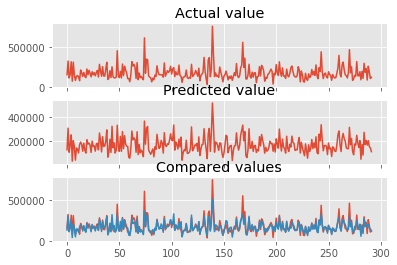

In [52]:
fig, axs = plt.subplots(3)
axs[0].set_title('Actual value')
axs[0].plot(vytest)
axs[1].set_title('Predicted value')
axs[1].plot(y_pred2)
axs[2].set_title('Compared values')
axs[2].plot(vytest)
axs[2].plot(y_pred2)
for ax in axs.flat:
    ax.label_outer()

In [53]:
print("Mean Absolute Error:", mean_absolute_error(vytest, y_pred2))
print("Mean Squared Error:", mean_squared_error(vytest, y_pred2))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(vytest, y_pred2))  )

Mean Absolute Error: 25566.637146832192
Mean Squared Error: 1671894716.5624826
Root Mean Squared Error: 40888.8091849406
